In [226]:
import sys

In [227]:
print(sys.path)
print(sys.executable)

['/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python310.zip', '/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python3.10', '/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python3.10/lib-dynload', '', '/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python3.10/site-packages']
/opt/homebrew/anaconda3/envs/optimization_env_munc/bin/python


In [228]:
try:
    import sklearn
    print('scikit-learn installed, version:', sklearn.__version__)
except Exception as e:
    print('scikit-learn not importable:', e)

scikit-learn installed, version: 1.7.2


In [229]:
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
import pandas as pd
from munc13 import Munc13, Solver

In [230]:
import sys
print(sys.path)

['/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python310.zip', '/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python3.10', '/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python3.10/lib-dynload', '', '/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python3.10/site-packages']


In [231]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [232]:
parameter_ranges = {
        "kfsr":      {"min": 0.001, "max": 10},   # kfSR uM-1s-1
        #"krsr_nostim":      {"min": 0.1,   "max": 1000}, # krSR_nostim
        "krsr":       {"min": 0.001,   "max": 1000}, # krSR_stim s-1
        "kfmm":      {"min": 0.1, "max": 10},   # kfMM uM-1s-1
        "krmm":      {"min": 0.01,   "max": 10}, # krMM s-1
        "kfmx":      {"min": 0.001, "max": 10},   # kf1x uM-1s-1
        "krmx":      {"min": 0.01,   "max": 1000}, # kr1x s-1
       # "kfc_nostim":      {"min": 0.001, "max": 10},   # kfc_nostim
        "kfc":      {"min": 0.001, "max": 10},   # kfc_stim uM-1s-1
        "krc":      {"min": 0.01, "max": 1000},   # krc
        "kfq":      {"min": 0.001, "max": 10},   # kx2 uM-1s-1
        "krq":      {"min": 0.01,   "max": 1000}, # krx2 s-1
        "eLoop":      {"min": 0.0001,   "max": 10}, # exp(free energy kT units <0).
        "eDF":      {"min": 0.0001,   "max": 10}, # exp(free energy kT units <0).
        "kfdd":     {"min": 0.01,   "max": 1}, # kfdd unimolecular: s-1
        "Sd":     {"min": 0.1,   "max": 10}, # scalar to change on/off kinetics of dimer to cluster
        "stimUpSR":       {"min": 1,   "max": 100}, # stimUpSR: scale factor >1
        "S0":        {"min": 0.001, "max": 5},   # S0 (uM)
        "R0":        {"min": 0.1, "max": 10000},   # R0 (/um^2)
        #"D1":        {"min": 0.05,   "max": 5}, # D1
        #"D1_over_D2":        {"min": 1.5,   "max": 5}, # D2
        "X0":        {"min": 0.01,   "max": 100}, # X0  (/um^2)
        "Q0":       {"min": 0.01,   "max":  100}, # Q0  (/um^2)
       
         
}



    # Order in which the solver will read parameters from a candidate
    # so, e.g. candidate[0] = kfsr.
   
params_to_optimize1 = np.array([
        "kfsr","krsr","kfmm","krmm","kfmx","krmx","kfc","krc","kfq","krq","eLoop","eDF","kfdd","Sd","stimUpSR","S0","R0","X0","Q0"
])
# Instantiate the model and solver
maxTime=1000.0
model = Munc13(parameter_ranges, params_to_optimize1, t_max=maxTime)

Gamma is 333.3333333333333


# List the numbers of all Results files and the text name of the file

In [233]:
#---These files include Q as a parameter. D as a fitness term---#
#fileNums=[251, 999, 7882, 1905, 2331, 898, 9288, 2104, 8778, 5975, 1015]
#fileResults="testParms_Dterm_Lifetimes"

#---These files set Q=0. D is a fitness term--#
#fileNums=[29, 3513, 463, 4323, 1808]
#fileResults = "testParms_noQ_Lifetimes"
#fileName = f"../data/{fileResults}_{fileNums[0]}.txt"
#----these files set Q=0. D and lifetime are fitness terms --#
#fileNums=[8537, 5049, 632, 4554, 3447, 4106, 558, 7678, 374, 7112, 6620]
#-----these files are same as above, but pop size = 50K or 30K with 6 gens---#
fileNums = [9353, 6122, 4167, 5645, 6614, 8967, 8212, 8906, 4627, 2051, 2252, 1295, 1679, 1277, 9730, 8958, 6201]
fileResults = "testParms_noQ_ChiLifetimes"
fileName = f"../data/{fileResults}_{fileNums[0]}.txt"

print("First file to open...: ", fileName)
unique_id=20001
print("unique id to label files: ", unique_id)

First file to open...:  ../data/testParms_noQ_ChiLifetimes_9353.txt
unique id to label files:  20001


START HERE TO PERFORM CLUSTERING

In [234]:
#read in all solutions in the output file.
import pandas as pd


fileName = f"../data/{fileResults}_{fileNums[0]}.txt"

dataF = pd.read_csv(fileName, sep=",", engine="python")
dataF.columns = dataF.columns.str.strip()
#dataF = dataF.sort_values(by="Rank")
print(dataF.shape)
#print(dataF.loc[25])
#store the parameters in the param_cols vector
param_cols = [col for col in dataF.columns if col not in ["Rank", "Fitness"]]
print(param_cols)

log_param_cols = [col for col in dataF.columns if col not in ["Rank", "Fitness","Sd","stimUpSR"]]
print(log_param_cols)



(51155, 21)
['kfsr', 'krsr', 'kfmm', 'krmm', 'kfmx', 'krmx', 'kfc', 'krc', 'kfq', 'krq', 'eLoop', 'eDF', 'kfdd', 'Sd', 'stimUpSR', 'S0', 'R0', 'X0', 'Q0']
['kfsr', 'krsr', 'kfmm', 'krmm', 'kfmx', 'krmx', 'kfc', 'krc', 'kfq', 'krq', 'eLoop', 'eDF', 'kfdd', 'S0', 'R0', 'X0', 'Q0']


(-110.0, 10.0)

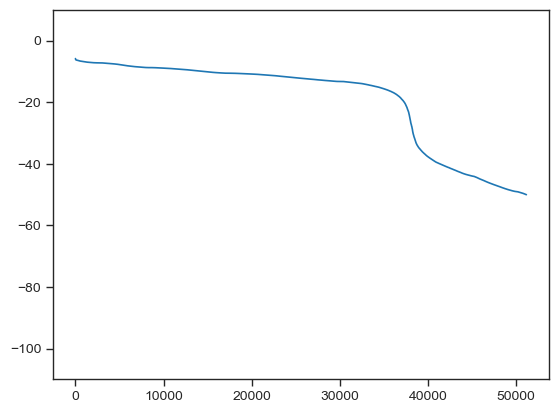

In [235]:
#plot the index vs the fitness for this dataset
plt.plot(dataF['Rank'], dataF['Fitness'])
plt.ylim([-110, 10])

In [236]:
#Only keep values of the dataset that have a fitness better than a threshold
fitness_threshold = -20
# Filter the DataFrame to only include rows with Fitness greater than the threshold
filtered_dataF = dataF[dataF['Fitness'] > fitness_threshold]
print(f"Number of rows with Fitness > {fitness_threshold}: {filtered_dataF.shape[0]}")
print(filtered_dataF.head())
#print(filtered_dataF.tail())

Number of rows with Fitness > -20: 37311
   Rank  Fitness     kfsr      krsr    kfmm     krmm     kfmx      krmx  \
0     0  -5.8098  0.75803  0.024656  3.9832  0.18268  0.00158  0.087601   
1     1  -5.8311  1.22410  0.024656  3.9832  0.18268  0.00158  0.087601   
2     2  -5.8779  1.22410  0.032888  3.9832  0.18268  0.00158  0.070078   
3     3  -5.8973  1.22410  0.035241  3.2893  0.18268  0.00158  0.051814   
4     4  -5.9017  1.22410  0.036074  3.9832  0.18268  0.00158  0.087601   

      kfc       krc  ...     krq   eLoop      eDF     kfdd     Sd  stimUpSR  \
0  3.5974  0.057195  ...  273.75  1.3967  0.00214  0.11605  1.296    4.3374   
1  3.9333  0.057195  ...  273.75  1.3967  0.00214  0.11605  1.296    5.3579   
2  3.4065  0.062038  ...  150.12  1.3967  0.00214  0.11605  1.296    5.3579   
3  3.1715  0.057195  ...  273.75  1.3967  0.00214  0.11605  1.296    5.3579   
4  3.4429  0.057195  ...  273.75  1.3967  0.00214  0.11605  1.296    5.3579   

         S0       R0        X0   

In [237]:
#store the very best solution from each GA run.
selected_solutions = filtered_dataF.nlargest(1, 'Fitness').copy()
print(selected_solutions)

   Rank  Fitness     kfsr      krsr    kfmm     krmm     kfmx      krmx  \
0     0  -5.8098  0.75803  0.024656  3.9832  0.18268  0.00158  0.087601   

      kfc       krc  ...     krq   eLoop      eDF     kfdd     Sd  stimUpSR  \
0  3.5974  0.057195  ...  273.75  1.3967  0.00214  0.11605  1.296    4.3374   

         S0      R0        X0            Q0  
0  0.001648  11.431  0.080022  1.237000e-50  

[1 rows x 21 columns]


In [238]:
#read in multiple datasets, filter for fitness threshold and concatenate before clustering.

for num in range(1,len(fileNums)):
    fileName = f"../data/{fileResults}_{fileNums[num]}.txt"
    print("Read filename: ", fileName)
    dataF = pd.read_csv(fileName, sep=",", engine="python")
    dataF.columns = dataF.columns.str.strip()
    threshold_dataF = dataF[dataF['Fitness'] > fitness_threshold]
    print(f"Number of rows with Fitness > {fitness_threshold}: {filtered_dataF.shape[0]}")
    tempDF = pd.concat([filtered_dataF, threshold_dataF])
    filtered_dataF=tempDF
    top1 = threshold_dataF.nlargest(1, 'Fitness').copy()
    tempTop = pd.concat([selected_solutions, top1])
    selected_solutions=tempTop
print("size of new dataset: ", filtered_dataF.shape)


Read filename:  ../data/testParms_noQ_ChiLifetimes_6122.txt
Number of rows with Fitness > -20: 37311
Read filename:  ../data/testParms_noQ_ChiLifetimes_4167.txt
Number of rows with Fitness > -20: 74265
Read filename:  ../data/testParms_noQ_ChiLifetimes_5645.txt
Number of rows with Fitness > -20: 111859
Read filename:  ../data/testParms_noQ_ChiLifetimes_6614.txt
Number of rows with Fitness > -20: 149130
Read filename:  ../data/testParms_noQ_ChiLifetimes_8967.txt
Number of rows with Fitness > -20: 186517
Read filename:  ../data/testParms_noQ_ChiLifetimes_8212.txt
Number of rows with Fitness > -20: 224103
Read filename:  ../data/testParms_noQ_ChiLifetimes_8906.txt
Number of rows with Fitness > -20: 260032
Read filename:  ../data/testParms_noQ_ChiLifetimes_4627.txt
Number of rows with Fitness > -20: 288637
Read filename:  ../data/testParms_noQ_ChiLifetimes_2051.txt
Number of rows with Fitness > -20: 316909
Read filename:  ../data/testParms_noQ_ChiLifetimes_2252.txt
Number of rows with Fitn

In [239]:
print(filtered_dataF[0:10])

   Rank  Fitness     kfsr      krsr    kfmm     krmm     kfmx      krmx  \
0     0  -5.8098  0.75803  0.024656  3.9832  0.18268  0.00158  0.087601   
1     1  -5.8311  1.22410  0.024656  3.9832  0.18268  0.00158  0.087601   
2     2  -5.8779  1.22410  0.032888  3.9832  0.18268  0.00158  0.070078   
3     3  -5.8973  1.22410  0.035241  3.2893  0.18268  0.00158  0.051814   
4     4  -5.9017  1.22410  0.036074  3.9832  0.18268  0.00158  0.087601   
5     5  -5.9053  1.22410  0.024656  3.9832  0.18268  0.00158  0.070563   
6     6  -5.9081  1.22410  0.033032  3.9832  0.18268  0.00158  0.087601   
7     7  -5.9714  1.22410  0.032724  2.3642  0.18268  0.00158  0.087601   
8     8  -5.9882  1.22410  0.035876  2.7613  0.18268  0.00158  0.058122   
9     9  -5.9948  0.80861  0.024656  3.9832  0.18268  0.00158  0.087601   

      kfc       krc  ...     krq   eLoop       eDF     kfdd     Sd  stimUpSR  \
0  3.5974  0.057195  ...  273.75  1.3967  0.002140  0.11605  1.296    4.3374   
1  3.9333  0.0

In [240]:
print("top solutions: ", selected_solutions)

top solutions:     Rank  Fitness       kfsr       krsr     kfmm      krmm      kfmx  \
0     0  -5.8098   0.758030   0.024656  3.98320  0.182680  0.001580   
0     0 -10.3520   0.524230   0.178620  0.10590  0.201730  0.016890   
0     0  -6.5024   0.394260   0.303540  4.65230  0.875250  0.043040   
0     0  -3.6932   0.030091   0.034680  1.13790  0.067359  0.028600   
0     0 -11.9354   0.003949   0.003309  5.35590  3.118000  0.025850   
0     0  -3.0535   0.008314   0.008911  0.13174  0.018850  0.036241   
0     0  -4.1227   5.386200  42.796000  2.04560  0.013496  6.676900   
0     0  -2.0583   2.037500   0.344170  6.14150  0.411930  0.035825   
0     0  -3.1867   0.028766   0.004841  1.58640  0.028961  2.616800   
0     0  -4.2824   8.282300   9.579000  3.90560  0.425700  0.054186   
0     0  -2.2607   0.256730   0.051660  2.09430  0.151260  0.030187   
0     0  -8.0537   0.043661   0.002540  1.95840  2.032200  0.996810   
0     0  -3.2790   0.019881   2.655800  0.92700  0.018145  2.

(-25.0, -1.0)

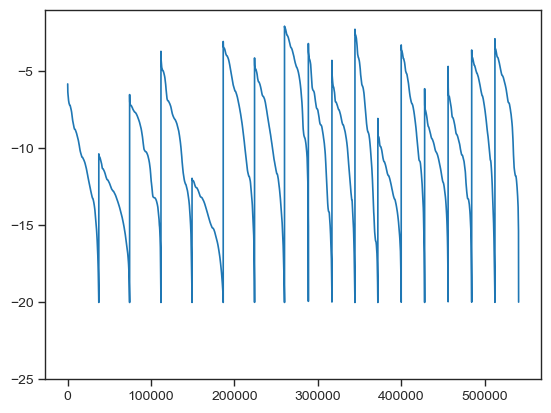

In [241]:
xVals = np.arange(0, filtered_dataF.shape[0])
plt.plot(xVals, filtered_dataF['Fitness'])
plt.ylim([-25, -1])

In [242]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import math

In [243]:


#cols = ['kfmm','krmm','kfc']   # example feature columns
X = filtered_dataF[param_cols].values
print(param_cols)
print(X.shape)
print(X[1,:])
logX = np.log10(X)
print(logX[1,:])
print(10 ** logX[1,:])

['kfsr', 'krsr', 'kfmm', 'krmm', 'kfmx', 'krmx', 'kfc', 'krc', 'kfq', 'krq', 'eLoop', 'eDF', 'kfdd', 'Sd', 'stimUpSR', 'S0', 'R0', 'X0', 'Q0']
(540787, 19)
[1.2241e+00 2.4656e-02 3.9832e+00 1.8268e-01 1.5804e-03 8.7601e-02
 3.9333e+00 5.7195e-02 1.5010e-01 2.7375e+02 1.3967e+00 2.1400e-03
 1.1605e-01 1.2960e+00 5.3579e+00 1.6481e-03 7.4304e+00 8.0022e-02
 1.2370e-50]
[  0.0878169   -1.60807738   0.60023211  -0.738309    -2.80123298
  -1.05749094   0.59475707  -1.24264194  -0.82361931   2.43735413
   0.14510313  -2.66958623  -0.93535486   0.112605     0.7289946
  -2.78301644   0.87101219  -1.0967906  -49.9076303 ]
[1.2241e+00 2.4656e-02 3.9832e+00 1.8268e-01 1.5804e-03 8.7601e-02
 3.9333e+00 5.7195e-02 1.5010e-01 2.7375e+02 1.3967e+00 2.1400e-03
 1.1605e-01 1.2960e+00 5.3579e+00 1.6481e-03 7.4304e+00 8.0022e-02
 1.2370e-50]


In [244]:
#perform clustering on the parameter sets
#first transform all data.
#Standard Scaler will evaluate the mean and variance, taking all values, subtracting means and dividing by variants.
#for all rates, they should be in log-transformed values.
scaler=StandardScaler()
Xs = scaler.fit_transform(logX)

In [245]:
nCluster = 30
kmeans = KMeans(n_clusters=nCluster, init='k-means++')

In [246]:
labels = kmeans.fit_predict(Xs)

In [247]:
centroids_scaled = kmeans.cluster_centers_             # in scaled space
centroids_original = scaler.inverse_transform(centroids_scaled)
#return the original values back to their non-log-transformed values.
centroid_10 = 10 ** centroids_original
print(centroids_original.shape)
print("first center, log10 ",centroids_original[1,:])
print("0 center, lin units ", centroid_10[0,:])
filtered_dataF['cluster'] = labels         # attach labels back to DataFrame
print("number of rows ", labels.shape)
print("labels for first 10 rows ", labels[1:10])
print(filtered_dataF[0:10])

(30, 19)
first center, log10  [ -1.61491033  -1.46389297   0.34249538  -1.34441101  -1.71852029
   1.1111359    0.64461048  -0.94112968  -2.51938729   2.67368362
  -0.05054469  -3.01494123  -0.15184288   0.3424049    0.97453371
  -0.25583065   0.91444046  -1.62726175 -49.15512901]
0 center, lin units  [7.49216523e+00 5.19765266e-02 1.40358558e-01 1.98957468e-02
 4.64210316e-01 4.09213124e-01 2.99651838e+00 1.64237958e-01
 8.02692292e+00 5.93966046e-02 5.41591660e-01 3.51033362e-04
 4.23382015e-02 6.22075673e+00 1.44552265e+01 1.99068377e-03
 2.85291429e+00 2.45679394e-02 6.46560549e-50]
number of rows  (540787,)
labels for first 10 rows  [20 20 20 20 20 20 20 20 20]
   Rank  Fitness     kfsr      krsr    kfmm     krmm     kfmx      krmx  \
0     0  -5.8098  0.75803  0.024656  3.9832  0.18268  0.00158  0.087601   
1     1  -5.8311  1.22410  0.024656  3.9832  0.18268  0.00158  0.087601   
2     2  -5.8779  1.22410  0.032888  3.9832  0.18268  0.00158  0.070078   
3     3  -5.8973  1.22410

In [248]:
# Find the size of each cluster (number of elements per cluster)
cluster_counts = filtered_dataF['cluster'].value_counts().sort_index()
#print("Cluster sizes:")
#print(cluster_counts)

# Example: count how many elements have a particular value, e.g., cluster label 16
label_to_check = 3
count_label = (filtered_dataF['cluster'] == label_to_check).sum()
print(f"Number of elements with cluster label {label_to_check}: {count_label}")

# Calculate the mean fitness of all elements in each cluster
mean_fitness_per_cluster = filtered_dataF.groupby('cluster')['Fitness'].mean().sort_index()
#print("Mean fitness per cluster:")
#print(mean_fitness_per_cluster)
print(mean_fitness_per_cluster[label_to_check])
#print(filtered_dataF.loc[1658])
#print(filtered_dataF.loc[1659])
sorted_fitness = mean_fitness_per_cluster.sort_values(ascending=False)
sorted_clusters = sorted_fitness.index.tolist()
print("Sorted mean fitness per cluster:")
print(sorted_fitness)
print("Order of clusters by mean fitness:", sorted_clusters)
sorted_size=cluster_counts.sort_values(ascending = False)
sorted_cluster_sizes = sorted_size.index.tolist()
print("Sorted cluster sizes")
print(sorted_size)
print("order of clusters by size:",sorted_cluster_sizes)

#find the indexes of all the elements in a specific cluster
indexes_in_cluster = filtered_dataF.index[filtered_dataF['cluster'] == label_to_check].tolist()
print(f"Indexes of elements in cluster {label_to_check}: (first 10)", indexes_in_cluster[0:10])


Number of elements with cluster label 3: 19558
-12.674799754576133
Sorted mean fitness per cluster:
cluster
19    -3.598051
0     -5.297552
29    -5.513656
24    -6.109569
28    -6.395893
27    -6.655964
15    -6.833241
11    -7.958236
2     -8.051741
18    -8.122283
7     -8.255615
20    -9.075111
1     -9.232401
16    -9.320771
13    -9.518658
6     -9.922165
22    -9.973500
12   -10.085331
10   -10.982037
14   -10.984992
25   -11.006071
23   -11.658646
17   -12.031330
3    -12.674800
21   -12.736242
9    -12.876157
8    -13.110555
26   -13.754017
5    -13.892815
4    -14.509691
Name: Fitness, dtype: float64
Order of clusters by mean fitness: [19, 0, 29, 24, 28, 27, 15, 11, 2, 18, 7, 20, 1, 16, 13, 6, 22, 12, 10, 14, 25, 23, 17, 3, 21, 9, 8, 26, 5, 4]
Sorted cluster sizes
cluster
4     37402
1     37247
16    35920
2     28109
11    27864
13    27602
22    21939
3     19558
24    19285
21    18895
12    18299
6     18077
5     18059
20    17747
15    17274
8     16679
14    16665
23 

In [249]:
centroid_df = pd.DataFrame(centroid_10, columns=param_cols)
#assign the fitness based on the mean fitness.

centroid_df['Fitness']=mean_fitness_per_cluster
#now resort the clusters by fitness values
cols = centroid_df.columns.tolist()
cols = ['Fitness'] + [col for col in cols if col != 'Fitness']
centroid_df = centroid_df[cols]

sorted_centroid = centroid_df.sort_values(by='Fitness',ascending=False)
print(sorted_centroid[0:8])

     Fitness      kfsr      krsr      kfmm      krmm      kfmx      krmx  \
19 -3.598051  2.021009  0.340898  5.330639  0.409129  0.036772  1.277837   
0  -5.297552  7.492165  0.051977  0.140359  0.019896  0.464210  0.409213   
29 -5.513656  0.256353  0.043525  5.377815  0.103902  0.029992  0.177375   
24 -6.109569  0.008260  0.008849  0.131771  0.015410  0.023979  0.267688   
28 -6.395893  0.028581  0.004812  2.216256  0.028854  2.587778  2.082600   
27 -6.655964  7.500817  0.051924  0.140192  0.019917  0.463520  0.410506   
15 -6.833241  2.023400  0.341941  5.325011  0.416620  0.022084  1.279043   
11 -7.958236  8.542122  5.204905  2.923700  0.017476  0.001936  0.014406   

         kfc       krc       kfq         krq     eLoop       eDF      kfdd  \
19  7.151838  0.052412  0.001377    0.058512  1.690168  0.000805  0.974910   
0   2.996518  0.164238  8.026923    0.059397  0.541592  0.000351  0.042338   
29  8.552880  0.702720  0.008732    0.366632  0.185768  0.060318  0.015444   
24 

In [250]:
print("Mean of each column in log10centroid_10:")
print(np.mean(np.log10(centroid_10), axis=0))
print("Std of each column in centroid_10:")
print(np.std(np.log10(centroid_10), axis=0))


Mean of each column in log10centroid_10:
[ -0.33085853  -0.93602267   0.09934863  -0.77002233  -0.96461064
  -0.08584178   0.6073447   -0.67051558  -0.76625696   0.16266266
  -0.19309489  -2.50406675  -1.14403106   0.17686728   0.98983462
  -1.61792208   1.29663134  -1.61560586 -49.39605468]
Std of each column in centroid_10:
[1.01657571 1.08270279 0.6404213  0.81206854 1.09089862 0.88912265
 0.45161022 0.71590717 1.11153343 1.76463977 0.67768014 1.15119801
 0.61430038 0.44219697 0.4034121  0.99146249 0.75270669 0.16972844
 0.27628359]


In [251]:
logData = filtered_dataF
logData[log_param_cols]=np.log10(logData[log_param_cols])
#print(filtered_dataF.head())

In [252]:
#look at the mean and variance of each parameter in the clusters. use the log-transformed values
#print(logData.head())
mean_krsr_per_cluster = logData.groupby('cluster')['krsr'].mean().sort_index()
std_krsr_per_cluster = logData.groupby('cluster')['krsr'].std().sort_index()
print("<krsr>: ", mean_krsr_per_cluster)
print("std(krsr)", std_krsr_per_cluster)
mean_per_cluster = logData.groupby('cluster')[log_param_cols].mean().sort_index()
print("Mean per cluster for all parameters:")
print(mean_per_cluster)

# Compute the std of all columns grouped by cluster
std_per_cluster = logData.groupby('cluster')[log_param_cols].std().sort_index()
print("Std per cluster for all parameters:")
print(std_per_cluster)

<krsr>:  cluster
0    -1.284190
1    -1.463893
2     0.378627
3    -1.777427
4    -2.450911
5    -0.752246
6    -0.307245
7     0.394285
8    -2.277828
9    -0.508749
10   -1.431275
11    0.716413
12   -2.127721
13    0.978639
14   -2.317810
15   -0.466048
16    1.546698
17   -1.283302
18   -0.542868
19   -0.467378
20   -1.662501
21   -0.750276
22   -0.762729
23    0.395923
24   -2.053113
25   -2.583684
26   -0.255833
27   -1.284644
28   -2.317686
29   -1.361264
Name: krsr, dtype: float64
std(krsr) cluster
0     0.055088
1     0.056681
2     0.084240
3     0.108235
4     0.095750
5     0.061750
6     0.082462
7     0.066962
8     0.107395
9     0.119646
10    0.055907
11    0.055550
12    0.092925
13    0.053638
14    0.053665
15    0.061856
16    0.070657
17    0.056724
18    0.081514
19    0.063234
20    0.089562
21    0.063446
22    0.061951
23    0.063897
24    0.055423
25    0.080588
26    0.076225
27    0.053830
28    0.061173
29    0.094469
Name: krsr, dtype: float64
Mean per cl

In [253]:
#look for gaps in the assignments, indicating that they are not sorting by fitness.

nonconsecutive = [i for i in range(1, len(indexes_in_cluster)) if indexes_in_cluster[i] != indexes_in_cluster[i-1] + 1]
if nonconsecutive:
    print("Nonconsecutive index positions (gaps between elements):")
    for i in nonconsecutive:
        print(f"Gap between {indexes_in_cluster[i-1]} and {indexes_in_cluster[i]}")
else:
    print("All indexes are consecutive.")

Nonconsecutive index positions (gaps between elements):
Gap between 4239 and 5739
Gap between 5739 and 5816
Gap between 5816 and 5870
Gap between 5870 and 5882
Gap between 5882 and 6064
Gap between 6064 and 6168
Gap between 6168 and 6170
Gap between 6170 and 6432
Gap between 6432 and 6776
Gap between 6776 and 6793
Gap between 6793 and 6796
Gap between 6796 and 6828
Gap between 6828 and 7008
Gap between 7008 and 7045
Gap between 7045 and 7054
Gap between 7054 and 7152
Gap between 7152 and 7318
Gap between 7318 and 7337
Gap between 7337 and 7354
Gap between 7354 and 7369
Gap between 7369 and 7429
Gap between 7429 and 7482
Gap between 7482 and 7493
Gap between 7493 and 7527
Gap between 7527 and 7557
Gap between 7557 and 7561
Gap between 7561 and 7665
Gap between 7665 and 7674
Gap between 7674 and 7686
Gap between 7686 and 7710
Gap between 7710 and 7790
Gap between 7790 and 7835
Gap between 7835 and 7867
Gap between 7867 and 7914
Gap between 7914 and 8006
Gap between 8006 and 8013
Gap betw

In [254]:



# overall mean silhouette
#mean_sil = silhouette_score(Xs, labels)
#print("Mean silhouette:", mean_sil)

# per-sample silhouette values (useful for plotting / diagnostics)
#sample_sil = silhouette_samples(Xs, labels)  # array length = n_samples


In [255]:
#sample_sil = silhouette_samples(Xs, labels)  # array length = n_samples

In [256]:
#print(sample_sil[0:10])

PERFORM CROSS VALIDATION ON THE BEST SOLUTIONS
AND ON THE CLUSTER CENTROIDS.

In [257]:
#The clustered centroids in regular units: sorted_centroid
#the best solutions in regular units: selected_solutions
#print(selected_solutions)
#for each solution, evaluate each metric, and the error between the simulation and experiment.
#be sure to include the diffusion estimates. 
just_parms=selected_solutions[param_cols]
candidate=just_parms.iloc[0].values
print(candidate)
colWT = ['tau56','tau56Post', 'densPre','densPost','stimFact','percClust','percCPost','percDimer','percDPost','SSval','SSvalPost']
colC2A = ['C2Atau56','C2Atau56Post', 'C2AdensPre','C2AdensPost','C2AstimFact','C2ApercClust','C2ApercCPost','C2ApercDimer','C2ApercDPost','C2ASSval','C2ASSvalPost']

colD = ['D', 'Dpost', 'C2AD', 'C2ADpost']
[metricsWT,metricsC2A, metricsD]=model.compute_all_metrics(candidate)
print(len(metricsWT))
exp_metrics = pd.DataFrame([metricsWT], columns=colWT)
C2A_metrics = pd.DataFrame([metricsC2A], columns=colC2A)
D_metrics = pd.DataFrame([metricsD], columns = colD)

#compute tau56, densPre, denPost, stim, diffusion, percent in cluster, SS, dimer.
#same after mutation.
#add new rows:
#df.loc[len(df)] = new_row

print(exp_metrics)
print(C2A_metrics)
print(D_metrics)
print(len(just_parms))

[7.5803e-01 2.4656e-02 3.9832e+00 1.8268e-01 1.5804e-03 8.7601e-02
 3.5974e+00 5.7195e-02 1.5010e-01 2.7375e+02 1.3967e+00 2.1400e-03
 1.1605e-01 1.2960e+00 4.3374e+00 1.6481e-03 1.1431e+01 8.0022e-02
 1.2370e-50]
11
      tau56  tau56Post   densPre  densPost  stimFact  percClust  percCPost  \
0  9.499448   9.554127  0.010666  0.030212  2.141027   0.055718   0.073714   

   percDimer  percDPost     SSval  SSvalPost  
0   0.661972   0.724472  0.002811   0.004353  
    C2Atau56  C2Atau56Post  C2AdensPre  C2AdensPost  C2AstimFact  \
0  12.364608     12.419462    0.004741     0.022698     2.793877   

   C2ApercClust  C2ApercCPost  C2ApercDimer  C2ApercDPost  C2ASSval  \
0      0.056354      0.096564           0.0           0.0  0.001196   

   C2ASSvalPost  
0      0.003759  
          D     Dpost      C2AD  C2ADpost
0  0.039167  0.034311  0.074224  0.071629
17


In [258]:
print(len(just_parms))
print(just_parms.iloc[1])

17
kfsr        5.242300e-01
krsr        1.786200e-01
kfmm        1.059000e-01
krmm        2.017300e-01
kfmx        1.689000e-02
krmx        7.818300e-01
kfc         6.361600e+00
krc         1.143400e+01
kfq         1.045900e+00
krq         9.647400e+02
eLoop       7.786500e-03
eDF         3.015500e-04
kfdd        1.155200e-02
Sd          1.258600e+00
stimUpSR    5.879400e+00
S0          3.800700e-02
R0          8.806800e+01
X0          2.238400e-02
Q0          9.833200e-50
Name: 0, dtype: float64


In [259]:
#iterate over all other solutions in the just_parms array
for i in np.arange(1,len(just_parms)):
    candidate=just_parms.iloc[i].values
    print(candidate)
    [metricsWT,metricsC2A, metricsD]=model.compute_all_metrics(candidate)
    exp_metrics.loc[len(exp_metrics)] = metricsWT
    C2A_metrics.loc[len(C2A_metrics)] = metricsC2A
    D_metrics.loc[len(D_metrics)] = metricsD

print(exp_metrics)
print(D_metrics)

[5.2423e-01 1.7862e-01 1.0590e-01 2.0173e-01 1.6890e-02 7.8183e-01
 6.3616e+00 1.1434e+01 1.0459e+00 9.6474e+02 7.7865e-03 3.0155e-04
 1.1552e-02 1.2586e+00 5.8794e+00 3.8007e-02 8.8068e+01 2.2384e-02
 9.8332e-50]
[3.9426e-01 3.0354e-01 4.6523e+00 8.7525e-01 4.3040e-02 7.4196e-01
 7.9416e+00 4.8560e-02 3.2153e-01 7.0933e+00 2.1771e+00 1.7137e+00
 1.6356e-01 1.6493e+00 2.2048e+01 4.1796e-01 3.6132e+00 1.6767e-02
 3.6735e-50]
[3.0091e-02 3.4680e-02 1.1379e+00 6.7359e-02 2.8600e-02 1.3011e+01
 4.4423e+00 1.0743e-01 4.5819e-03 4.8978e+02 8.4948e-01 9.7252e-04
 7.6131e-01 1.1511e+00 4.2420e+00 5.5777e-01 4.2614e+00 3.0254e-02
 7.0571e-50]
[3.9494e-03 3.3091e-03 5.3559e+00 3.1180e+00 2.5850e-02 1.7039e+00
 4.2504e-02 2.6844e-01 7.6805e-02 4.3845e+01 3.3032e-01 4.2369e-04
 1.5279e-02 1.1874e+00 8.6274e+00 1.5477e-01 3.9865e+02 2.3632e-02
 1.0825e-50]
[8.3143e-03 8.9110e-03 1.3174e-01 1.8850e-02 3.6241e-02 2.6982e-01
 3.1139e+00 3.2163e-01 1.2706e-02 5.7477e+02 4.9844e-01 1.3312e-02
 3.1811e-0

In [260]:
print(C2A_metrics)
print(selected_solutions['Fitness'])

     C2Atau56  C2Atau56Post  C2AdensPre  C2AdensPost  C2AstimFact  \
0   12.364608     12.419462    0.004741     0.022698     2.793877   
1   11.232028     11.232063    0.009531     0.022243     3.293059   
2    9.458461      9.458950    0.015704     0.016358     2.503775   
3   10.860169     10.929901    0.009246     0.025373     2.040548   
4   11.260245     11.277625    0.010648     0.021544     3.208800   
5    6.236019      6.237787    0.011720     0.022979     2.128000   
6   12.738982     12.738990    0.008601     0.023891     2.036042   
7   10.110621     10.177491    0.010581     0.022792     2.835474   
8   13.390586     13.436874    0.010443     0.021665     3.092773   
9   10.747776     10.810636    0.006156     0.021798     2.297841   
10   9.610632      9.613419    0.012476     0.023801     3.361458   
11   7.284625      7.297298    0.011488     0.024994     2.963659   
12  10.551541     10.551547    0.009747     0.021932     2.043060   
13   6.274602      6.301760    0.0

In [261]:
#save data to files. Include the fitness values.

imageDir="/Users/margaret/Dropbox/r2025/Munc13/IMAGES"
dir=f"{imageDir}/Data_for_plots"
selected_solutions.to_csv(f"{dir}/Top11_solutions_Dterm_parameters_{unique_id}.csv", index=False)
exp_metrics.to_csv(f"{dir}/Top11_solutions_Dterm_WT_{unique_id}.csv")
C2A_metrics.to_csv(f"{dir}/Top11_solutions_Dterm_C2A_{unique_id}.csv")
D_metrics.to_csv(f"{dir}/Top11_solutions_Dterm_Diffusion_{unique_id}.csv")

# GENERATE PLOTS BASED ON A SPECIFIC CANDIDATE



# all of the below plots are based on the choice here of whichRow

In [262]:
whichRow=4
print('Fitness: ', selected_solutions['Fitness'].iloc[whichRow] )
candidate=selected_solutions[param_cols].iloc[whichRow].values
sol, solPost=model.simulate(candidate)
print(selected_solutions.iloc[whichRow])
outputRow=selected_solutions.iloc[whichRow]
#save this parameter set to file with the unique id
outputRow.to_csv(f"{dir}/ParameterSolution_{whichRow}_UsedForPlotting_{unique_id}.csv", index=False)


Fitness:  -11.9354
Rank        0.000000e+00
Fitness    -1.193540e+01
kfsr        3.949400e-03
krsr        3.309100e-03
kfmm        5.355900e+00
krmm        3.118000e+00
kfmx        2.585000e-02
krmx        1.703900e+00
kfc         4.250400e-02
krc         2.684400e-01
kfq         7.680500e-02
krq         4.384500e+01
eLoop       3.303200e-01
eDF         4.236900e-04
kfdd        1.527900e-02
Sd          1.187400e+00
stimUpSR    8.627400e+00
S0          1.547700e-01
R0          3.986500e+02
X0          2.363200e-02
Q0          1.082500e-50
Name: 0, dtype: float64


In [263]:
print(D_metrics.iloc[whichRow])
print(exp_metrics.iloc[whichRow])
print(C2A_metrics.iloc[whichRow])

D           0.031811
Dpost       0.029260
C2AD        0.079863
C2ADpost    0.079935
Name: 4, dtype: float64
tau56        9.497432e+00
tau56Post    9.497440e+00
densPre      2.362813e-02
densPost     2.363042e-02
stimFact     2.707071e+00
percClust    1.433715e-03
percCPost    5.296697e-04
percDimer    8.740952e-01
percDPost    9.217888e-01
SSval        7.056738e-07
SSvalPost    3.867377e-08
Name: 4, dtype: float64
C2Atau56        1.126024e+01
C2Atau56Post    1.127763e+01
C2AdensPre      1.064809e-02
C2AdensPost     2.154416e-02
C2AstimFact     3.208800e+00
C2ApercClust    1.218134e-03
C2ApercCPost    7.680867e-04
C2ApercDimer    0.000000e+00
C2ApercDPost    0.000000e+00
C2ASSval        6.994701e-04
C2ASSvalPost    9.557018e-07
Name: 4, dtype: float64


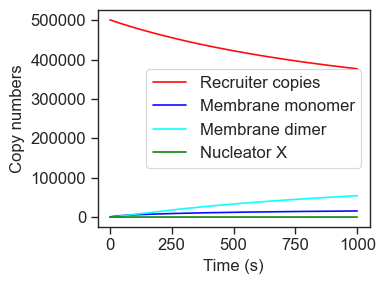

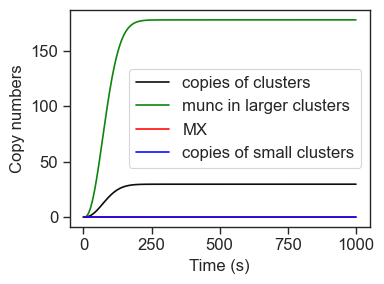

<Figure size 640x480 with 0 Axes>

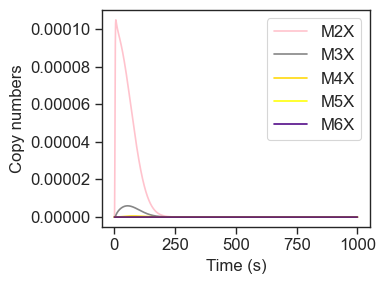

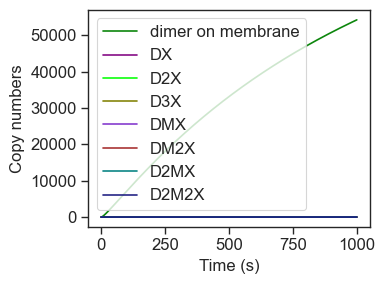

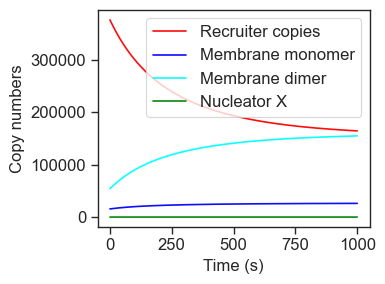

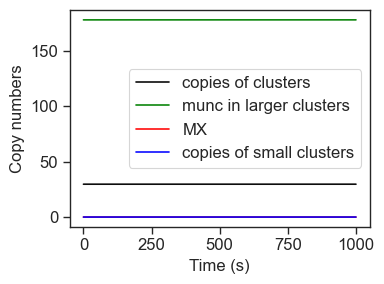

<Figure size 640x480 with 0 Axes>

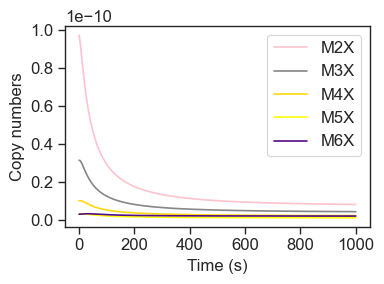

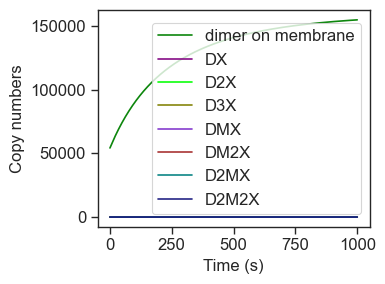

In [264]:
model.plot_freespecies_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_mycluster_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
plt.figure()
model.plot_each_cluster_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_DX_cluster_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_freespecies_time(solPost, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_mycluster_time(solPost, figsize=(4, 3), fontsize=12, dpi=300)
plt.figure()
model.plot_each_cluster_time(solPost, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_DX_cluster_time(solPost, figsize=(4, 3), fontsize=12, dpi=300)
#m
#m

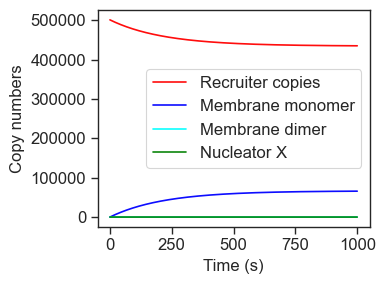

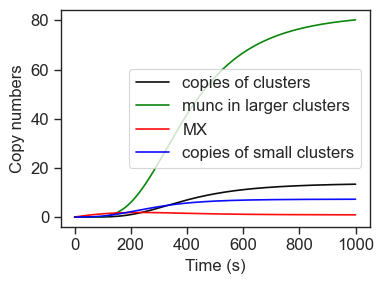

<Figure size 640x480 with 0 Axes>

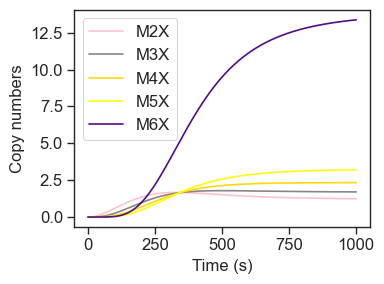

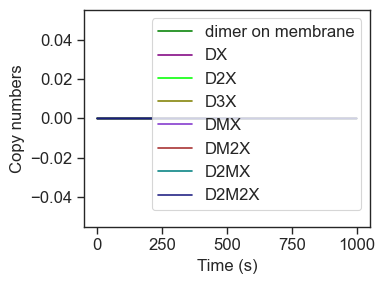

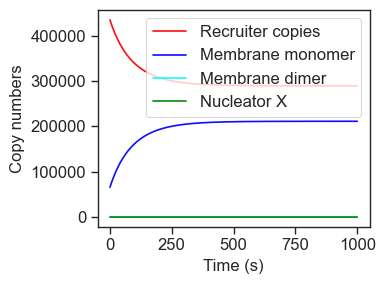

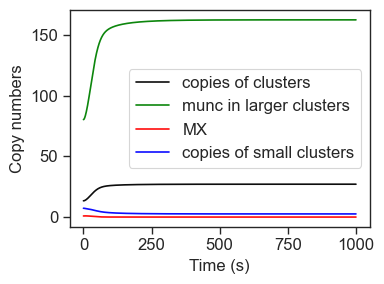

<Figure size 640x480 with 0 Axes>

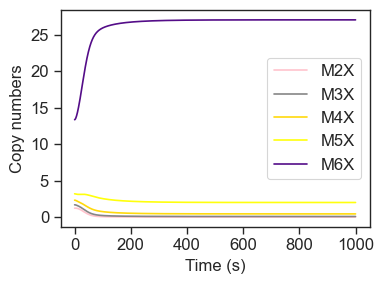

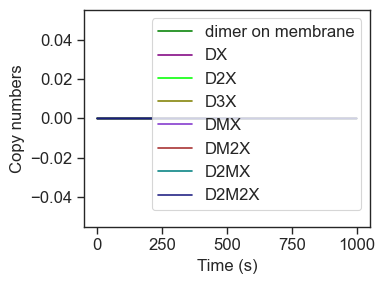

In [265]:
candidate_dc2a=list(candidate)
candidate_dc2a[2] = 0 #this sets kfmm to zero.
candidate_dc2a[12] = 0 #this sets kfdd to zero (no in cluster transition to 2M->D)
        
mut, mutPost = model.simulate(candidate_dc2a)
       
model.plot_freespecies_time(mut, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_mycluster_time(mut, figsize=(4, 3), fontsize=12, dpi=300)
plt.figure()
model.plot_each_cluster_time(mut, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_DX_cluster_time(mut, figsize=(4, 3), fontsize=12, dpi=300)
#m
model.plot_freespecies_time(mutPost, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_mycluster_time(mutPost, figsize=(4, 3), fontsize=12, dpi=300)
plt.figure()
model.plot_each_cluster_time(mutPost, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_DX_cluster_time(mutPost, figsize=(4, 3), fontsize=12, dpi=300)
#m

In [266]:
print(model.timePoints[1])

0.5


# Now generate plots and save to file for the paper

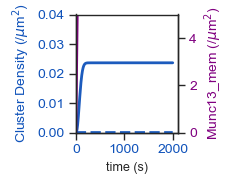

In [267]:
model.plot_time_resolved_density(sol, solPost,f"WT_{unique_id}_{whichRow}")

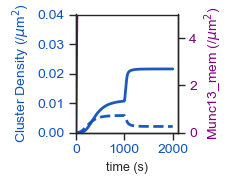

In [268]:
#Plot the same thing for the C2A mutant.
model.plot_time_resolved_density(mut, mutPost, f"C2A_{unique_id}_{whichRow}")

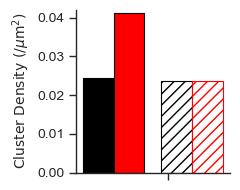

In [269]:
#plot cluster density as a bar plot
model.plot_density_vs_exp(sol, solPost, f"WT_{unique_id}_{whichRow}", whichExp='WT')

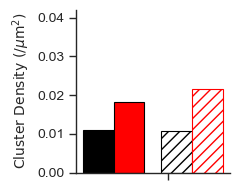

In [270]:
#plot cluster density as a bar plot
model.plot_density_vs_exp(mut, mutPost, f"C2A_{unique_id}_{whichRow}", whichExp='C2A')

In [271]:
print(D_metrics.iloc[whichRow])

D           0.031811
Dpost       0.029260
C2AD        0.079863
C2ADpost    0.079935
Name: 4, dtype: float64


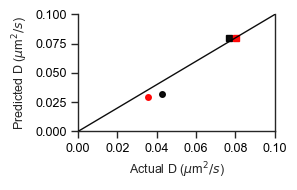

In [272]:
#make a plot that shows actual and predicted diffusion constants for

model.plot_diffusion_vs_exp(D_metrics, whichRow, fileStr=f"_{unique_id}_")


sizes pre stim, and sum:  [np.float64(0.124470960953822), np.float64(0.8740951590875008), np.float64(0.0014337145605895516)]
sizes POST stim, and sum:  [np.float64(0.07768148469732893), np.float64(0.9217888199706195), np.float64(0.0005296696874674255)]


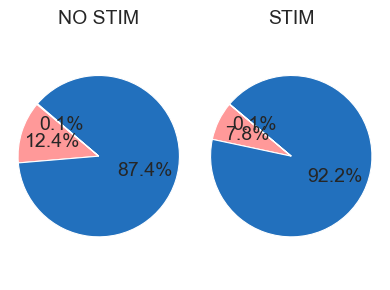

sizes pre stim, and sum:  [np.float64(0.9982666471719184), np.float64(0.0), np.float64(0.0012181342010409383)]
sizes POST stim, and sum:  [np.float64(0.9991737497850376), np.float64(0.0007680867144838357)]


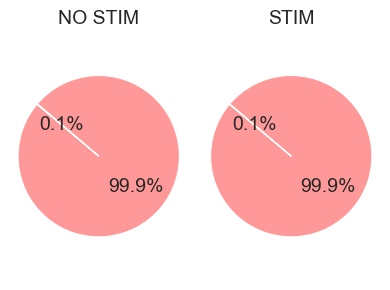

In [273]:
#create pie charts.
model.pie_charts(sol, solPost, [4,3], f"WT_{unique_id}_{whichRow}")
#create pie charts of the mutant.
model.pie_charts(mut, mutPost, [4,3], f"C2A_{unique_id}_{whichRow}")

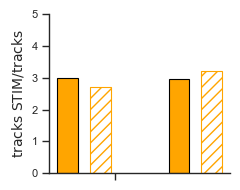

In [274]:
#plot the increase in tracks, experiment vs simulation
model.plot_track_increase_vs_exp(sol, solPost, mut, mutPost, fileStr=f"{unique_id}_row_{whichRow}", figsize=(2.5, 2))
       

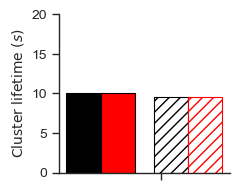

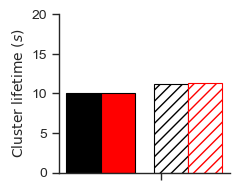

In [275]:
#create a plot comparing the lifetimes before and after stimulation
model.plot_lifetime_vs_exp(candidate, sol, solPost, f"{unique_id}_WT_{whichRow}")
#create the plot fot eh C2A mutant
model.plot_lifetime_vs_exp(candidate_dc2a, mut, mutPost, f"{unique_id}_C2A_{whichRow}")

# For the cluster centroids, also evaluate all the key metrics and save to file

In [276]:
#Set up the dataframe with the first solution results
just_parms=sorted_centroid[param_cols]
candidate=just_parms.iloc[0].values
print(candidate)
colWT = ['tau56','tau56Post', 'densPre','densPost','stimFact','percClust','percCPost','percDimer','percDPost','SSval','SSvalPost']
colC2A = ['C2Atau56','C2Atau56Post', 'C2AdensPre','C2AdensPost','C2AstimFact','C2ApercClust','C2ApercCPost','C2ApercDimer','C2ApercDPost','C2ASSval','C2ASSvalPost']

colD = ['D', 'Dpost', 'C2AD', 'C2ADpost']
[metricsWT,metricsC2A, metricsD]=model.compute_all_metrics(candidate)
print(len(metricsWT))
clus_metrics = pd.DataFrame([metricsWT], columns=colWT)
C2Aclus_metrics = pd.DataFrame([metricsC2A], columns=colC2A)
Dclus_metrics = pd.DataFrame([metricsD], columns = colD)

[2.02100864e+00 3.40898286e-01 5.33063927e+00 4.09129163e-01
 3.67719753e-02 1.27783663e+00 7.15183832e+00 5.24124431e-02
 1.37681312e-03 5.85124278e-02 1.69016798e+00 8.04599134e-04
 9.74910414e-01 1.69129619e+00 4.30957626e+00 2.43983516e-02
 4.05199086e+00 2.15131000e-02 4.60027365e-50]
11


In [277]:
#Now iterate over all other solutions in the sorted_centroid array
#add them to the dataframe.
for i in np.arange(1,len(just_parms)):
    candidate=just_parms.iloc[i].values
    print(candidate)
    [metricsWT,metricsC2A, metricsD]=model.compute_all_metrics(candidate)
    clus_metrics.loc[len(clus_metrics)] = metricsWT
    C2Aclus_metrics.loc[len(C2Aclus_metrics)] = metricsC2A
    Dclus_metrics.loc[len(Dclus_metrics)] = metricsD

print(clus_metrics)
print(Dclus_metrics)

[7.49216523e+00 5.19765266e-02 1.40358558e-01 1.98957468e-02
 4.64210316e-01 4.09213124e-01 2.99651838e+00 1.64237958e-01
 8.02692292e+00 5.93966046e-02 5.41591660e-01 3.51033362e-04
 4.23382015e-02 6.22075673e+00 1.44552265e+01 1.99068377e-03
 2.85291429e+00 2.45679394e-02 6.46560549e-50]
[2.56353447e-01 4.35247104e-02 5.37781506e+00 1.03902043e-01
 2.99923464e-02 1.77375124e-01 8.55288019e+00 7.02720205e-01
 8.73207111e-03 3.66632123e-01 1.85767629e-01 6.03176514e-02
 1.54437068e-02 1.38356150e+00 6.60857313e+01 6.42842885e-02
 3.00423785e+00 2.43517417e-02 3.09624134e-50]
[8.26022231e-03 8.84885923e-03 1.31771061e-01 1.54100959e-02
 2.39786906e-02 2.67688218e-01 3.09155974e+00 3.20005714e-01
 1.26142189e-02 5.66685461e+02 5.39932420e-01 1.37871270e-02
 3.15717624e-02 5.66955755e-01 5.92748851e+00 5.85317768e-01
 3.56742595e+00 2.96749837e-02 2.23435995e-50]
[2.85805048e-02 4.81184718e-03 2.21625560e+00 2.88540921e-02
 2.58777802e+00 2.08260021e+00 9.73058047e+00 4.05435511e-01
 1.26

In [278]:
print(C2Aclus_metrics)

     C2Atau56  C2Atau56Post  C2AdensPre  C2AdensPost  C2AstimFact  \
0   11.212794     11.287225    0.011216     0.020410     2.795744   
1   11.242277     11.242283    0.010831     0.021953     3.119378   
2    7.658798      7.660332    0.011870     0.023387     3.278809   
3    5.784619      5.787620    0.011216     0.025095     2.095421   
4    4.791742      4.793591    0.012122     0.020222     2.864493   
5    5.109993      5.109993    0.011334     0.016170     2.992953   
6    8.468018      8.508056    0.010411     0.017670     2.915596   
7   11.051256     11.100250    0.006719     0.022768     2.210425   
8    6.727525      6.727525    0.011983     0.019147     1.853674   
9    9.572409      9.574146    0.015487     0.016167     2.220964   
10   6.986922      6.986922    0.013424     0.017261     3.000753   
11  12.538796     12.602372    0.006365     0.029138     2.803300   
12   9.744732      9.808848    0.011799     0.023014     2.746272   
13  14.048094     14.048101    0.0

In [279]:
print(Dclus_metrics)

           D     Dpost      C2AD  C2ADpost
0   0.042290  0.037661  0.069449  0.073702
1   0.044973  0.041666  0.067742  0.074235
2   0.032705  0.030816  0.072472  0.076039
3   0.045552  0.039407  0.074428  0.075119
4   0.030914  0.029809  0.065750  0.073553
5   0.046738  0.042341  0.067967  0.075568
6   0.040595  0.035667  0.073184  0.076347
7   0.029153  0.027136  0.073228  0.071631
8   0.028050  0.027696  0.070688  0.073266
9   0.049692  0.043207  0.074936  0.077697
10  0.060563  0.058312  0.067801  0.075717
11  0.037039  0.033666  0.074986  0.073116
12  0.032170  0.029421  0.077500  0.078285
13  0.027186  0.026858  0.071950  0.070928
14  0.038508  0.033741  0.078759  0.078696
15  0.046271  0.038553  0.076643  0.078889
16  0.063332  0.067552  0.067897  0.072669
17  0.040112  0.036137  0.074419  0.075775
18  0.029834  0.029190  0.075327  0.076234
19  0.028239  0.027896  0.068776  0.074897
20  0.052251  0.044436  0.078061  0.079101
21  0.069337  0.070440  0.071530  0.077152
22  0.04746

In [280]:
print(C2Aclus_metrics)

     C2Atau56  C2Atau56Post  C2AdensPre  C2AdensPost  C2AstimFact  \
0   11.212794     11.287225    0.011216     0.020410     2.795744   
1   11.242277     11.242283    0.010831     0.021953     3.119378   
2    7.658798      7.660332    0.011870     0.023387     3.278809   
3    5.784619      5.787620    0.011216     0.025095     2.095421   
4    4.791742      4.793591    0.012122     0.020222     2.864493   
5    5.109993      5.109993    0.011334     0.016170     2.992953   
6    8.468018      8.508056    0.010411     0.017670     2.915596   
7   11.051256     11.100250    0.006719     0.022768     2.210425   
8    6.727525      6.727525    0.011983     0.019147     1.853674   
9    9.572409      9.574146    0.015487     0.016167     2.220964   
10   6.986922      6.986922    0.013424     0.017261     3.000753   
11  12.538796     12.602372    0.006365     0.029138     2.803300   
12   9.744732      9.808848    0.011799     0.023014     2.746272   
13  14.048094     14.048101    0.0

In [281]:
#print these solutions to file
allCentroidParmFile = f"{dir}/Centroid_solutions_Dterm_parameters_{unique_id}.csv"

sorted_centroid.to_csv(allCentroidParmFile, index=False)
clus_metrics.to_csv(f"{dir}/Centroid_solutions_Dterm_WT_{unique_id}.csv")
C2Aclus_metrics.to_csv(f"{dir}/Centroid_solutions_Dterm_C2A_{unique_id}.csv")
Dclus_metrics.to_csv(f"{dir}/Centroid_solutions_Dterm_Diffusion_{unique_id}.csv")

In [282]:
#filter solutions that have the correct trend with diffusion.
storeID=[]
for idx, row in D_metrics.iterrows():
    #print(f"Row {idx}: {row.to_dict()}")
    # You can access individual columns like row['D'], row['Dpost'], etc.
    ratio=row['D']/row['Dpost']
    
    if ratio>1.1:
        storeID.append(idx)

storeID=np.array(storeID)
print(storeID)
subset=selected_solutions.iloc[storeID]
subset.to_csv(f"{dir}/parameter_solutions_Dslows_{unique_id}.csv", index=False)


[ 0  1  2  3  5  7  9 10 11 15]


Total solutions loaded: 17
Using top 50% by Fitness -> 8 solutions.
Saved summary to: /Users/margaret/Dropbox/r2025/Munc13/IMAGES/sensitivityDterm_20001.png
Total solutions loaded: 10
Using top 50% by Fitness -> 5 solutions.
Saved summary to: /Users/margaret/Dropbox/r2025/Munc13/IMAGES/sensitivityDterm_20001_Dslows.png


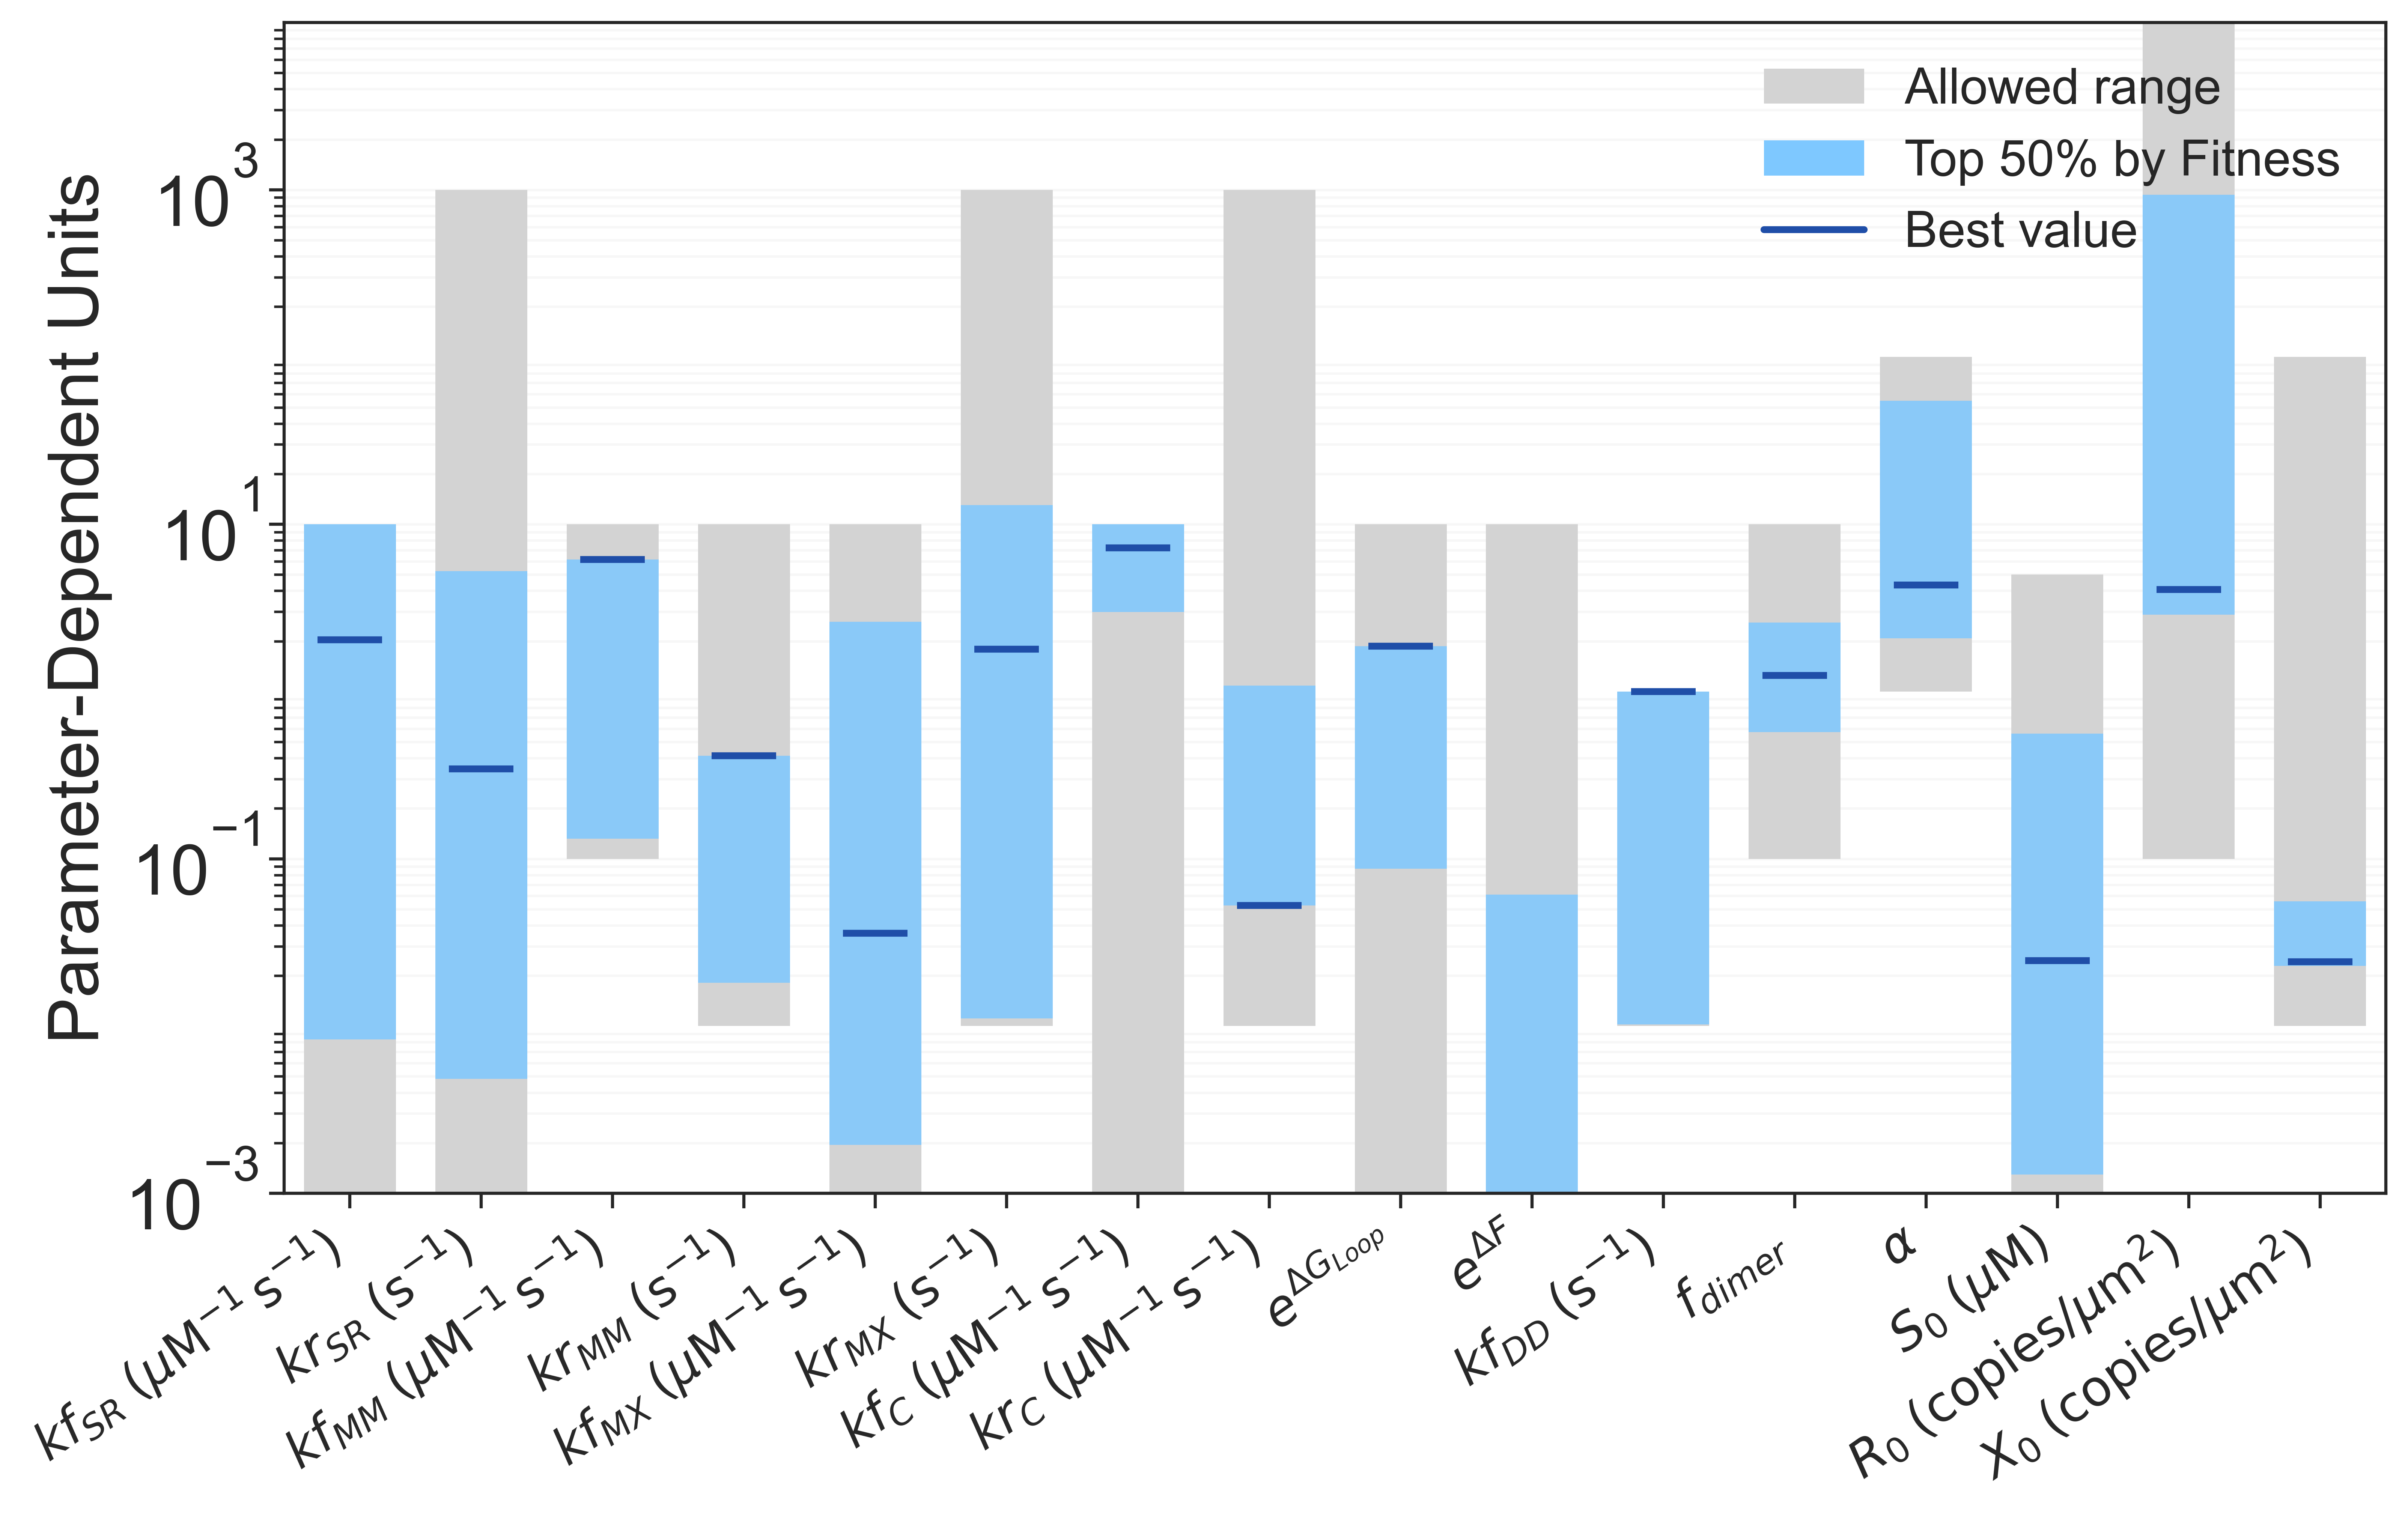

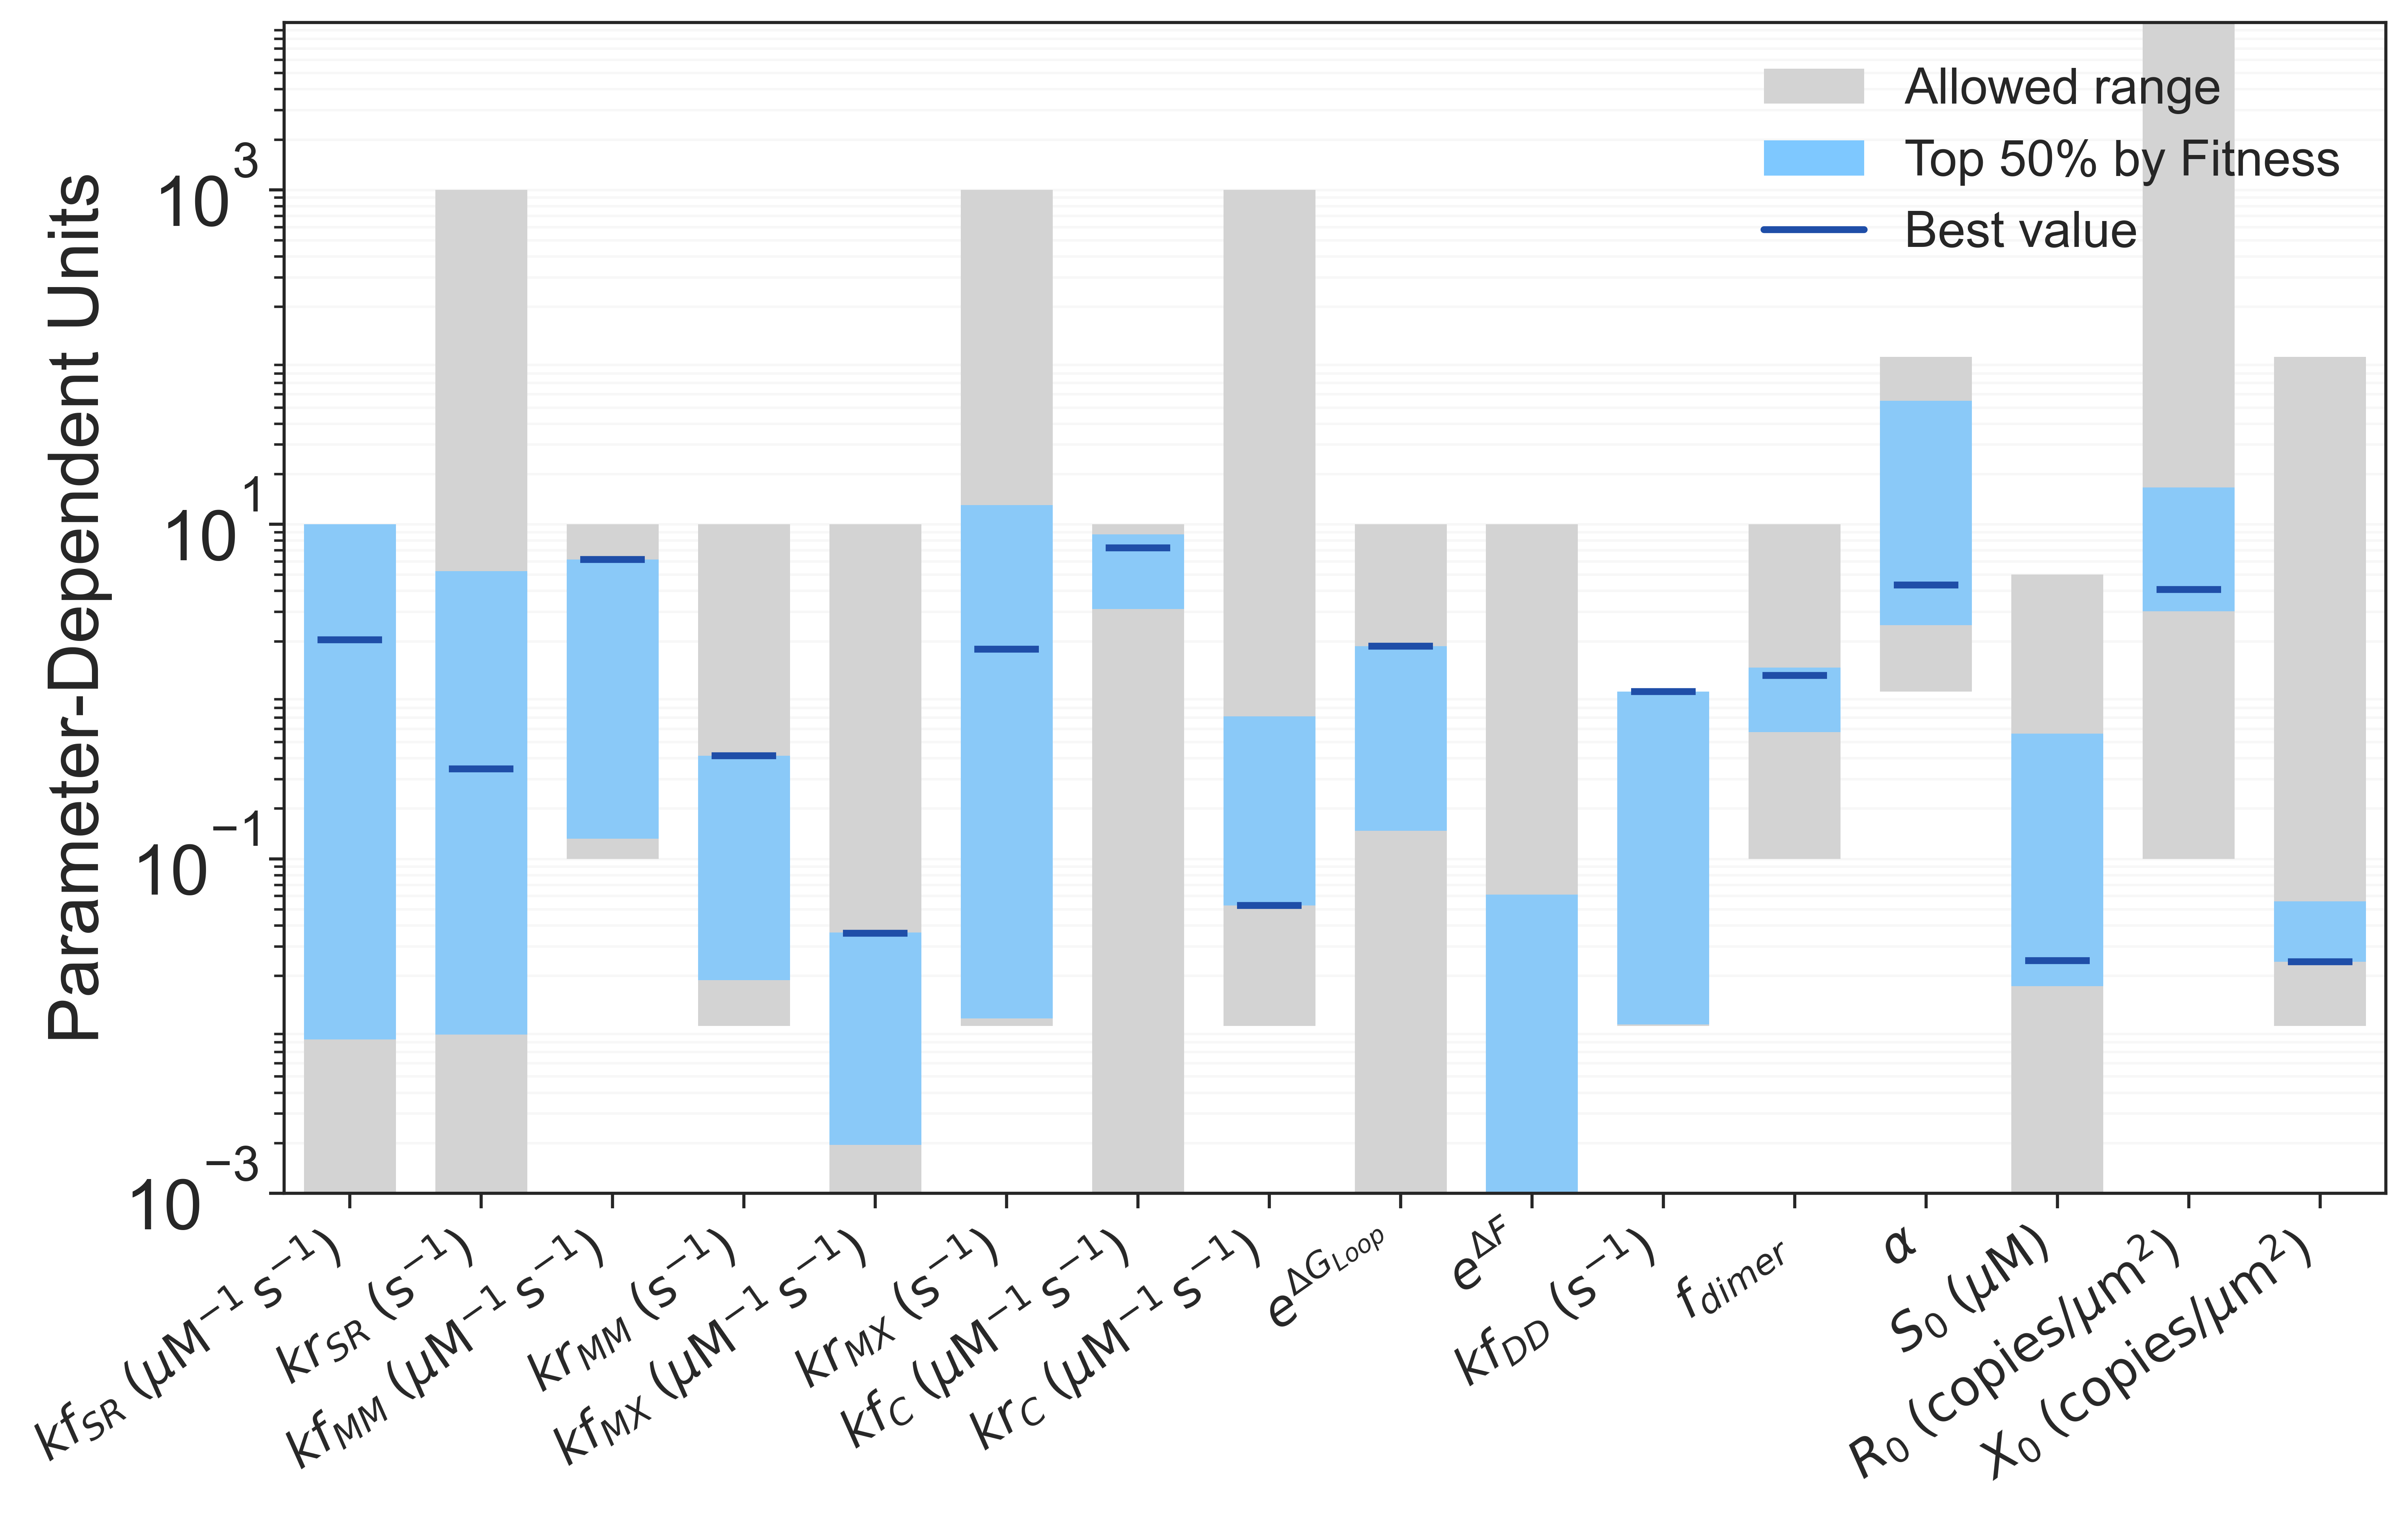

In [283]:
#plot paramter ranges for top solutions, for clusters, 
#and also just for solutions where mobility is good
model.plot_parameter_ranges_summary(parameter_ranges=parameter_ranges, percent=50, save_path=f"{imageDir}/sensitivityDterm_{unique_id}.png",inputFile=f"{dir}/Top11_solutions_Dterm_parameters_{unique_id}.csv")
model.plot_parameter_ranges_summary(parameter_ranges=parameter_ranges, percent=50, save_path=f"{imageDir}/sensitivityDterm_{unique_id}_Dslows.png",inputFile=f"{dir}/parameter_solutions_Dslows_{unique_id}.csv")


In [284]:
#filter solutions that have the correct trend with diffusion.
storeID2=[]
for idx, row in Dclus_metrics.iterrows():
    #print(f"Row {idx}: {row.to_dict()}")
    # You can access individual columns like row['D'], row['Dpost'], etc.
    ratio=row['D']/row['Dpost']
    
    if ratio>1.1:
        storeID2.append(idx)

storeID2=np.array(storeID2)
print(storeID2)
subset=sorted_centroid.iloc[storeID2]
parmFileSave = f"{dir}/centroid_parameter_solutions_Dslows_{unique_id}.csv"
subset.to_csv(parmFileSave, index=False)


[ 0  3  5  6  9 11 14 15 17 20 22 24 26 27 28]


Total solutions loaded: 30
Using top 50% by Fitness -> 15 solutions.
Saved summary to: /Users/margaret/Dropbox/r2025/Munc13/IMAGES/Data_for_plots/sensitivity_centroid_20001.png
Total solutions loaded: 15
Using top 50% by Fitness -> 7 solutions.
Saved summary to: /Users/margaret/Dropbox/r2025/Munc13/IMAGES/Data_for_plots/sensitivity_centroid_Dslows_20001.png


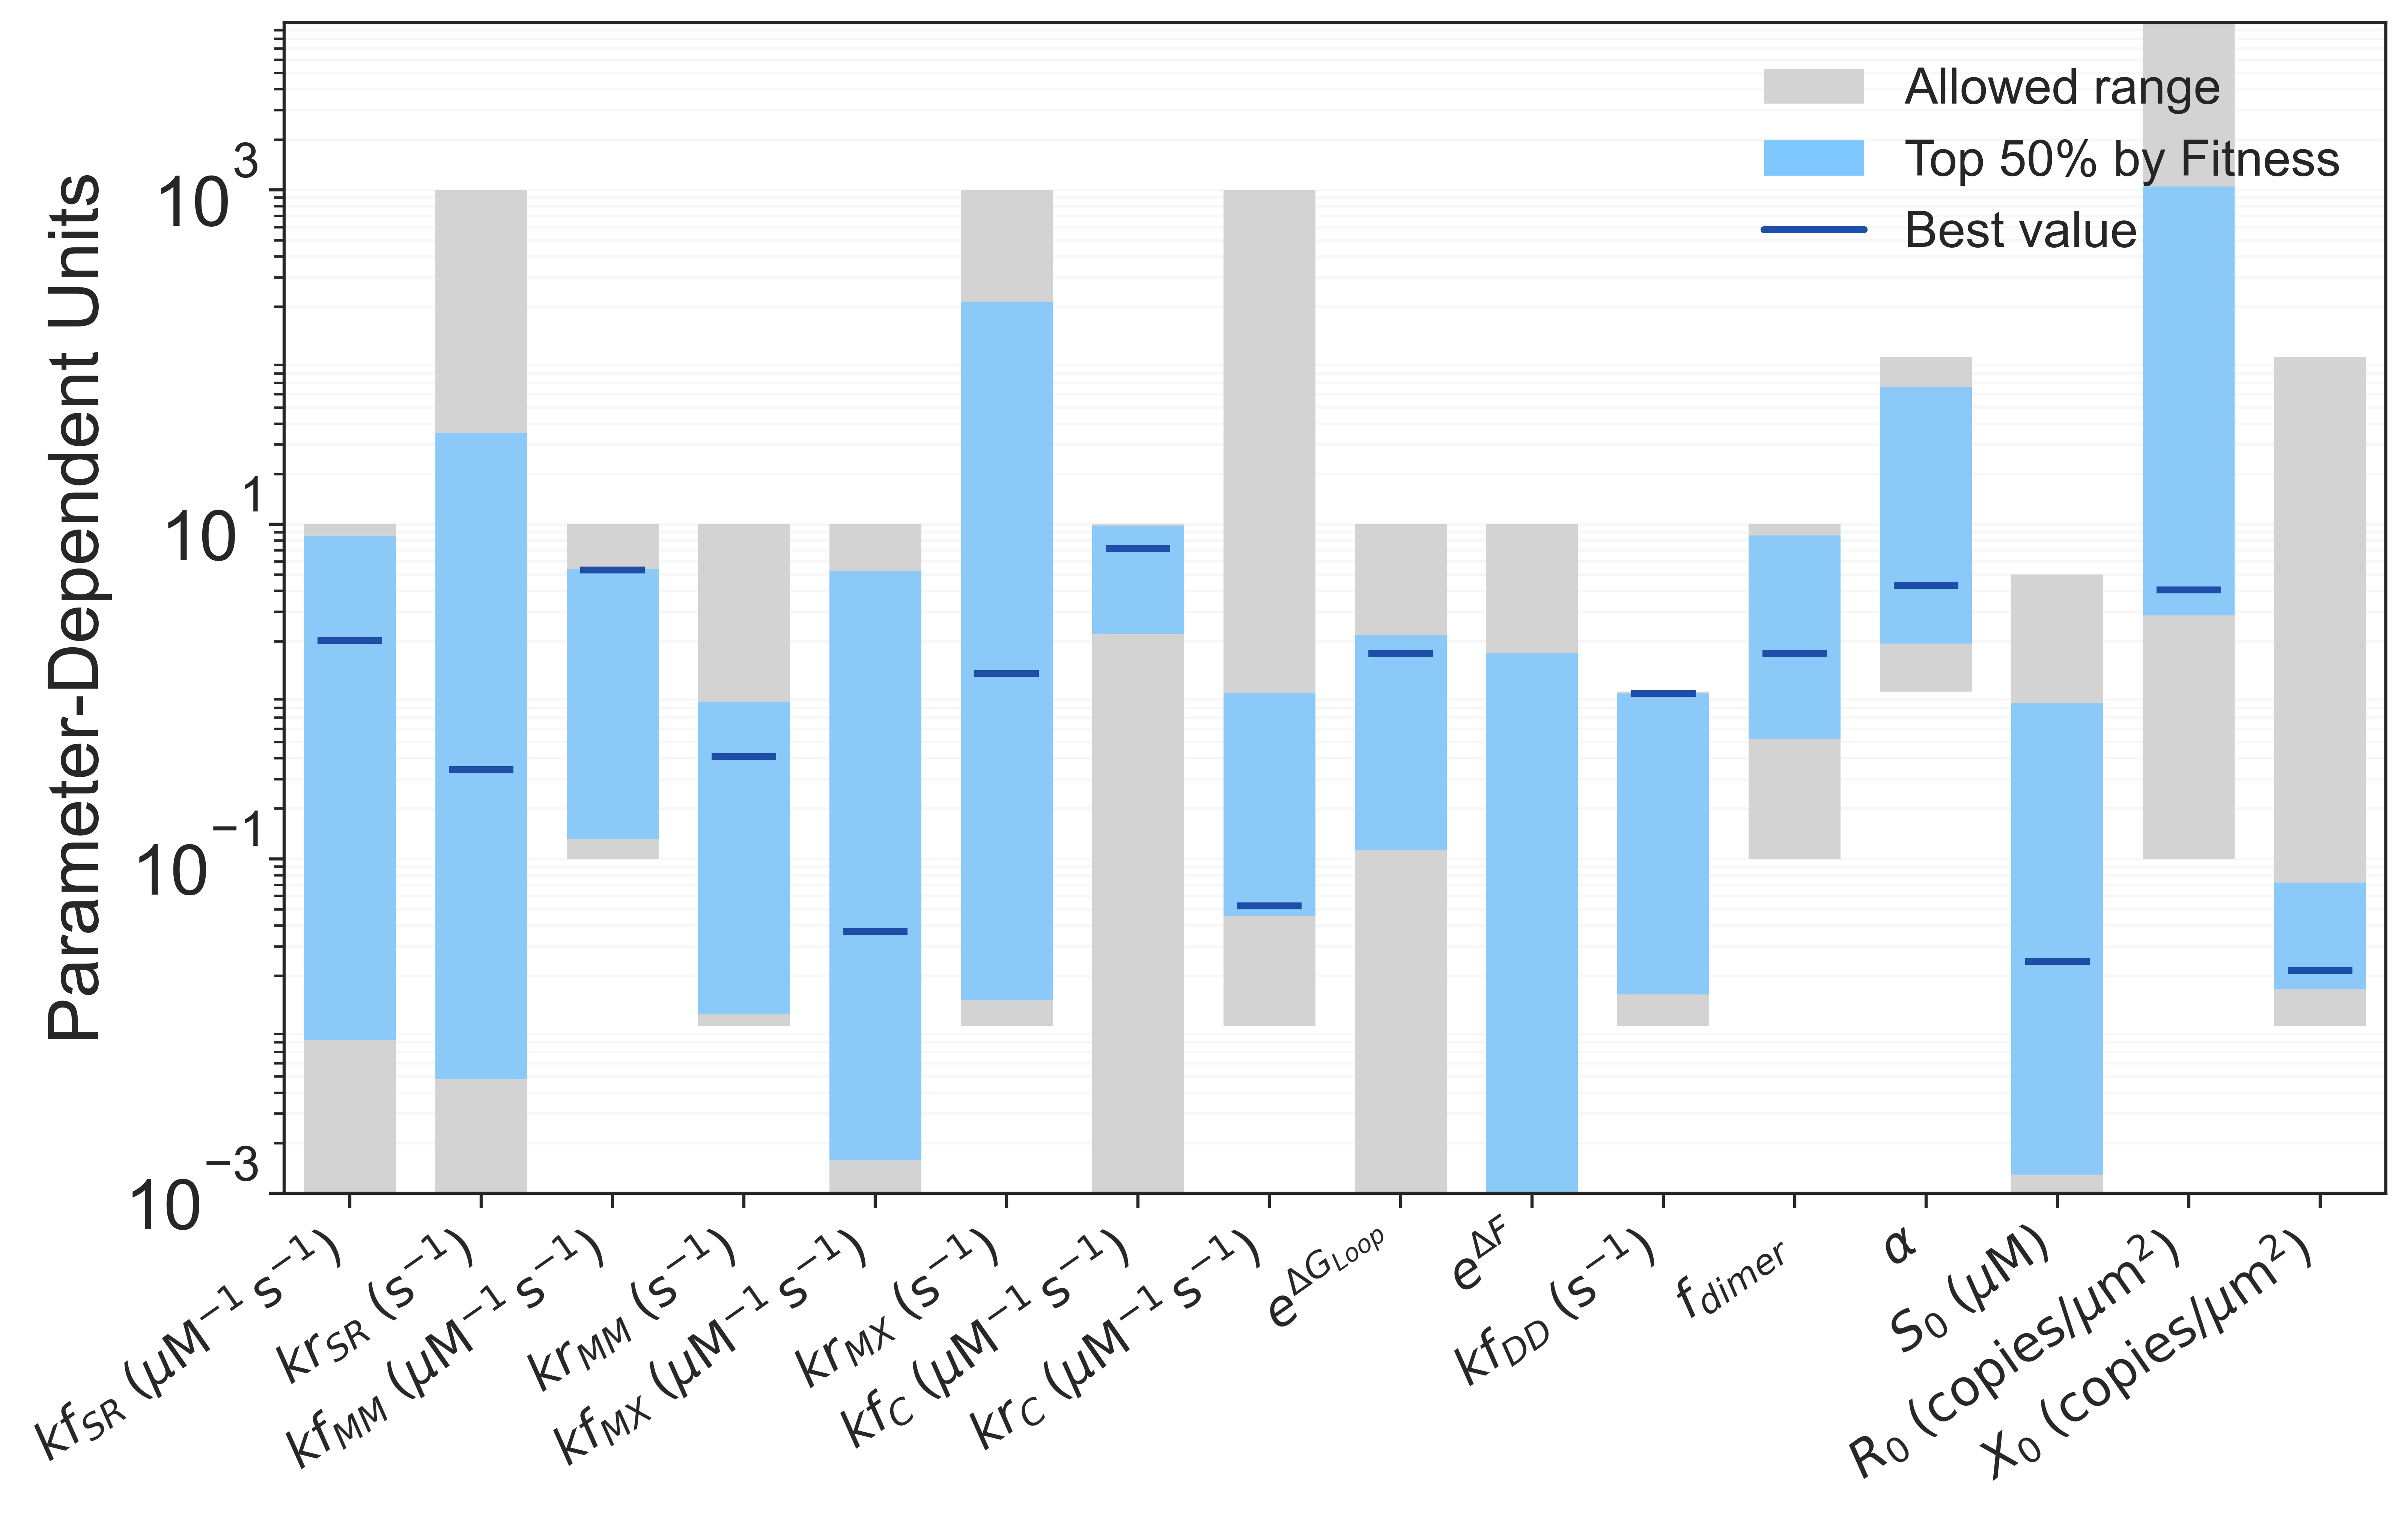

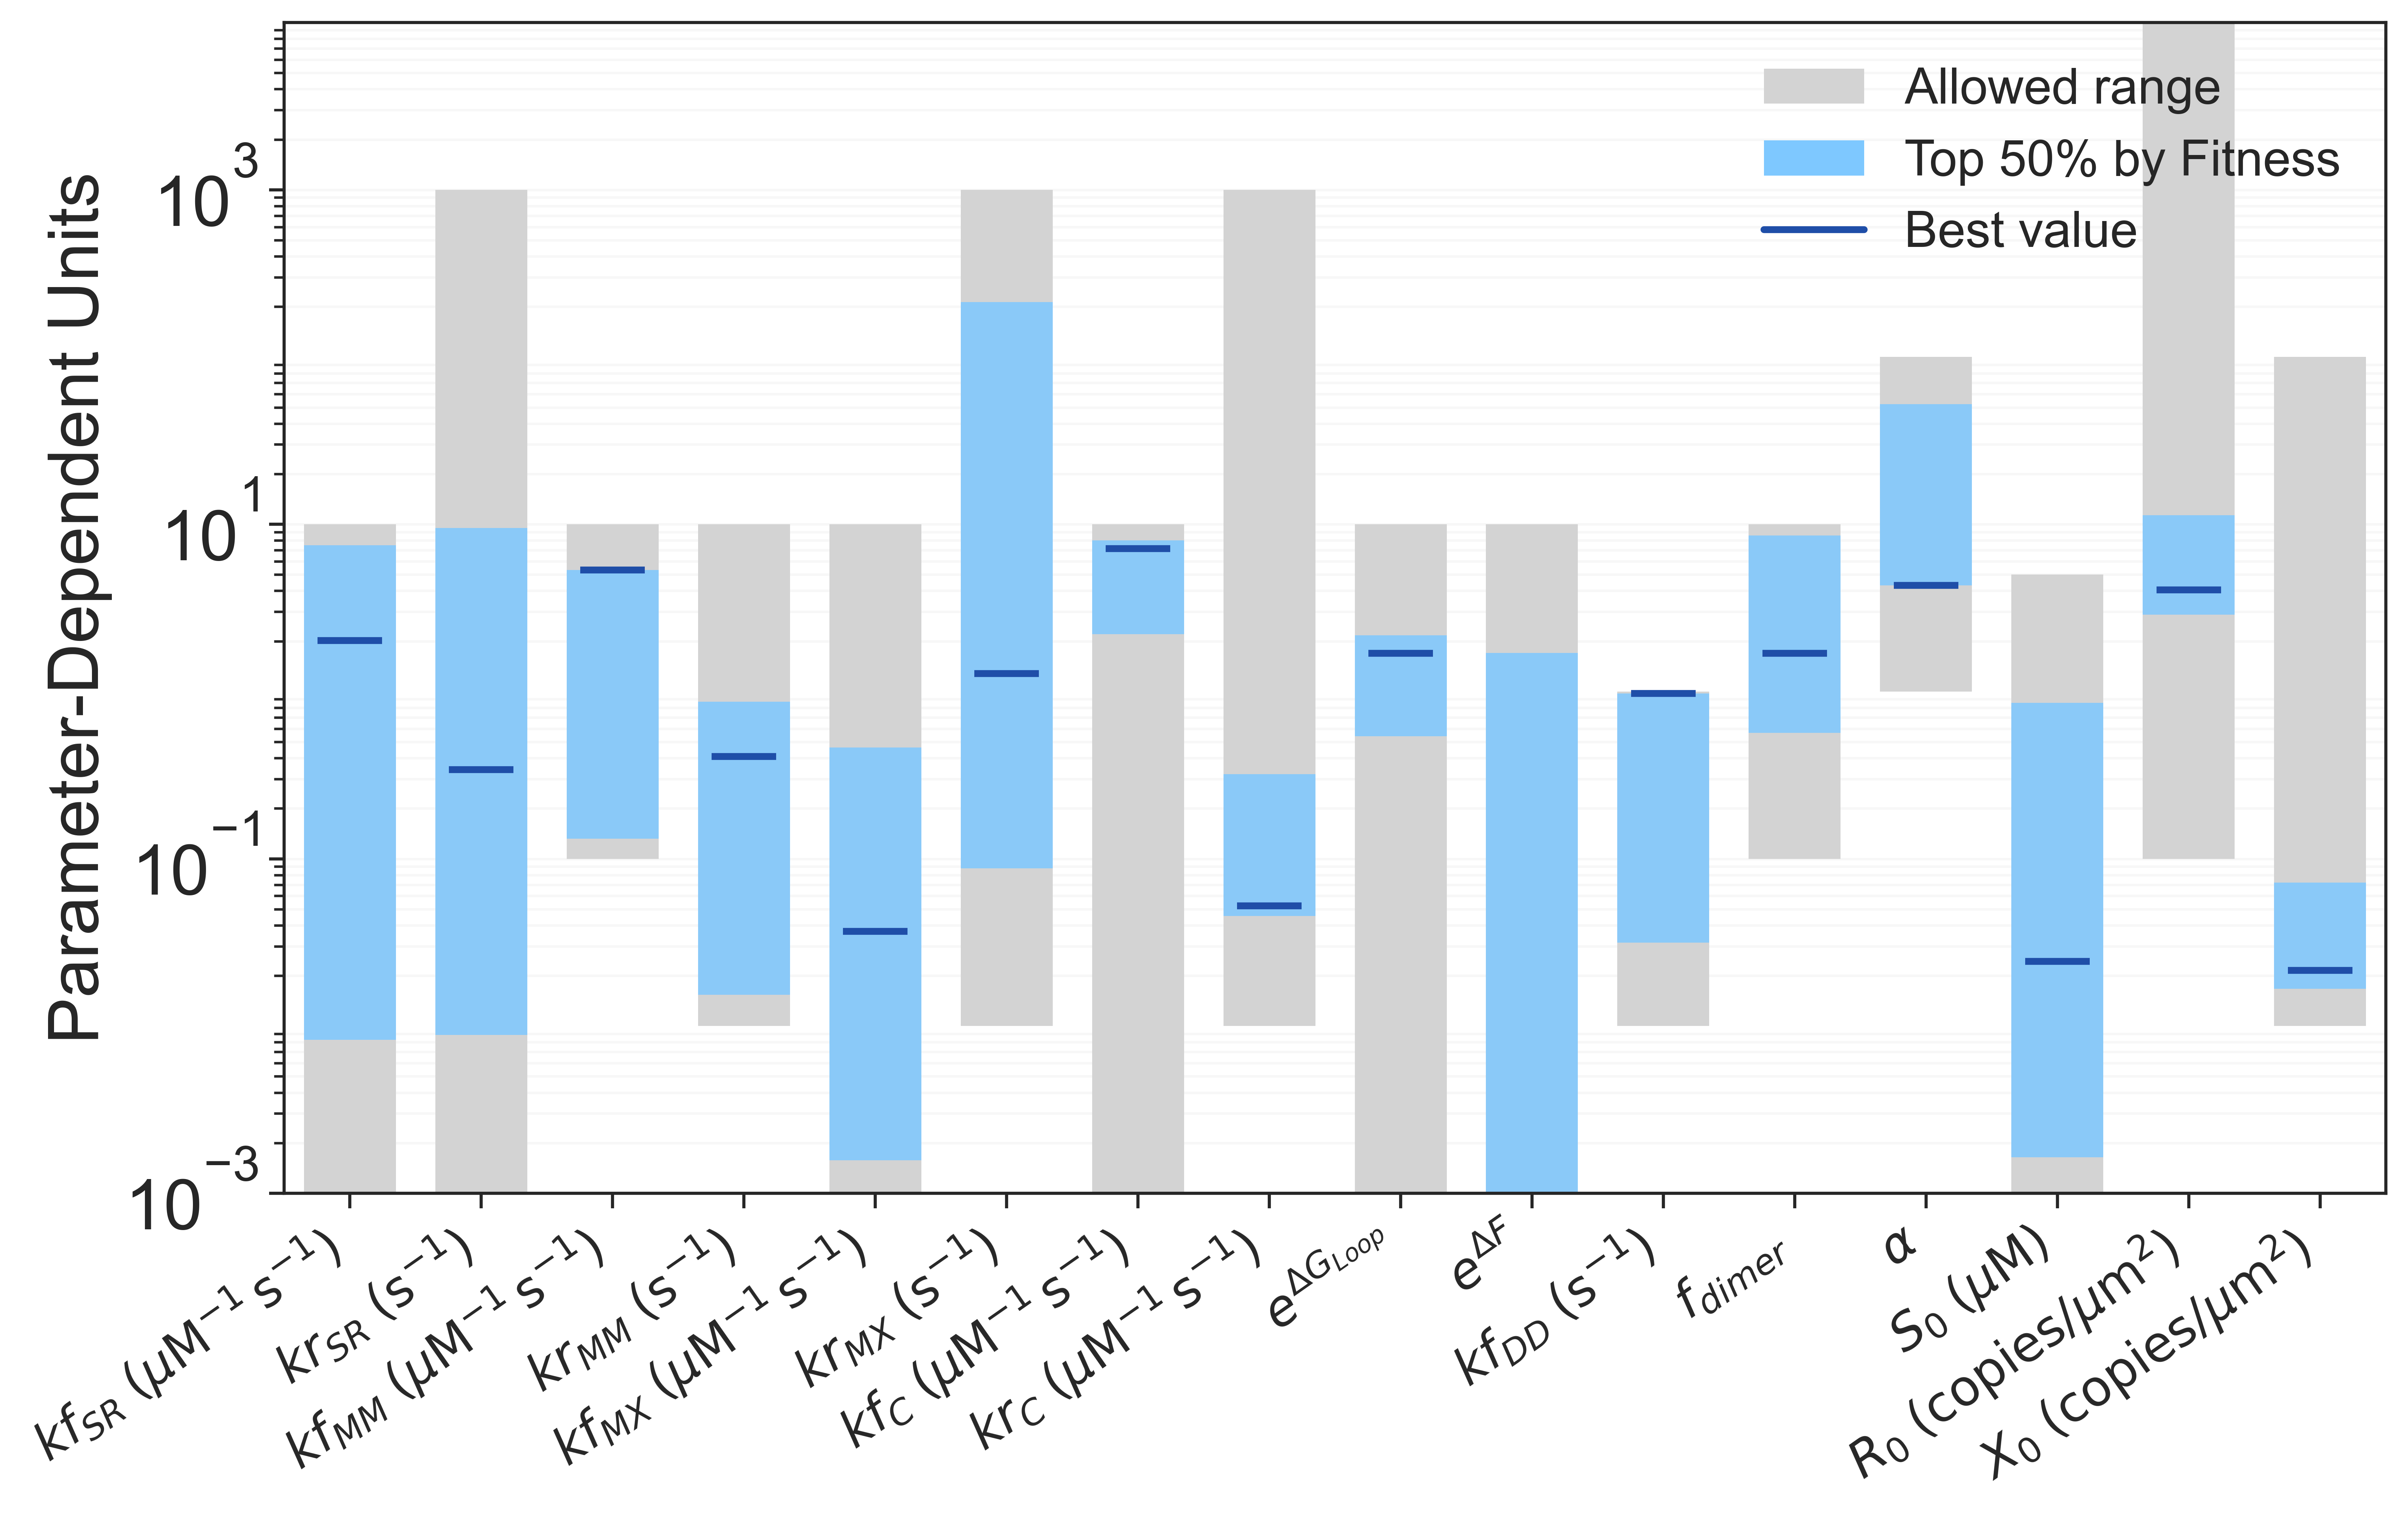

In [285]:
#now create the sensitivity plots based on all the clusters
model.plot_parameter_ranges_summary(parameter_ranges=parameter_ranges, percent=50, save_path=f"{dir}/sensitivity_centroid_{unique_id}.png",inputFile=allCentroidParmFile)
model.plot_parameter_ranges_summary(parameter_ranges=parameter_ranges, percent=50, save_path=f"{dir}/sensitivity_centroid_Dslows_{unique_id}.png",inputFile=parmFileSave)


# distribution of sampled KD values from top 11

Total solutions loaded: 17
Using top 50% by Fitness -> 8 solutions.
p:  kDsr
best_row        kDsr      kDmm       kDmx       kDc        kDq
0  0.168918  0.067073  49.923238  0.007279  47.560798
p:  kDmm
best_row        kDsr      kDmm       kDmx       kDc        kDq
0  0.168918  0.067073  49.923238  0.007279  47.560798
p:  kDmx
best_row        kDsr      kDmm       kDmx       kDc        kDq
0  0.168918  0.067073  49.923238  0.007279  47.560798
p:  kDc
best_row        kDsr      kDmm       kDmx       kDc        kDq
0  0.168918  0.067073  49.923238  0.007279  47.560798
p:  kDq
best_row        kDsr      kDmm       kDmx       kDc        kDq
0  0.168918  0.067073  49.923238  0.007279  47.560798


/Users/margaret/github/munc13-cluster/ode/source/munc13.py:2587: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_val = max(float(best_row[p]), tiny)
/Users/margaret/github/munc13-cluster/ode/source/munc13.py:2587: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_val = max(float(best_row[p]), tiny)
/Users/margaret/github/munc13-cluster/ode/source/munc13.py:2587: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_val = max(float(best_row[p]), tiny)
/Users/margaret/github/munc13-cluster/ode/source/munc13.py:2587: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_val = max(float(best_row[p]), ti

Saved summary to: /Users/margaret/Dropbox/r2025/Munc13/IMAGES/sensitivity_KD_Top11_20001.png
Total solutions loaded: 10
Using top 50% by Fitness -> 5 solutions.
p:  kDsr
best_row        kDsr      kDmm       kDmx       kDc        kDq
0  0.168918  0.067073  49.923238  0.007279  47.560798
p:  kDmm
best_row        kDsr      kDmm       kDmx       kDc        kDq
0  0.168918  0.067073  49.923238  0.007279  47.560798
p:  kDmx
best_row        kDsr      kDmm       kDmx       kDc        kDq
0  0.168918  0.067073  49.923238  0.007279  47.560798
p:  kDc
best_row        kDsr      kDmm       kDmx       kDc        kDq
0  0.168918  0.067073  49.923238  0.007279  47.560798
p:  kDq
best_row        kDsr      kDmm       kDmx       kDc        kDq
0  0.168918  0.067073  49.923238  0.007279  47.560798


/Users/margaret/github/munc13-cluster/ode/source/munc13.py:2587: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_val = max(float(best_row[p]), tiny)
/Users/margaret/github/munc13-cluster/ode/source/munc13.py:2587: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_val = max(float(best_row[p]), tiny)
/Users/margaret/github/munc13-cluster/ode/source/munc13.py:2587: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_val = max(float(best_row[p]), tiny)
/Users/margaret/github/munc13-cluster/ode/source/munc13.py:2587: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_val = max(float(best_row[p]), ti

Saved summary to: /Users/margaret/Dropbox/r2025/Munc13/IMAGES/sensitivity_KD_Top11_Dslows_20001.png


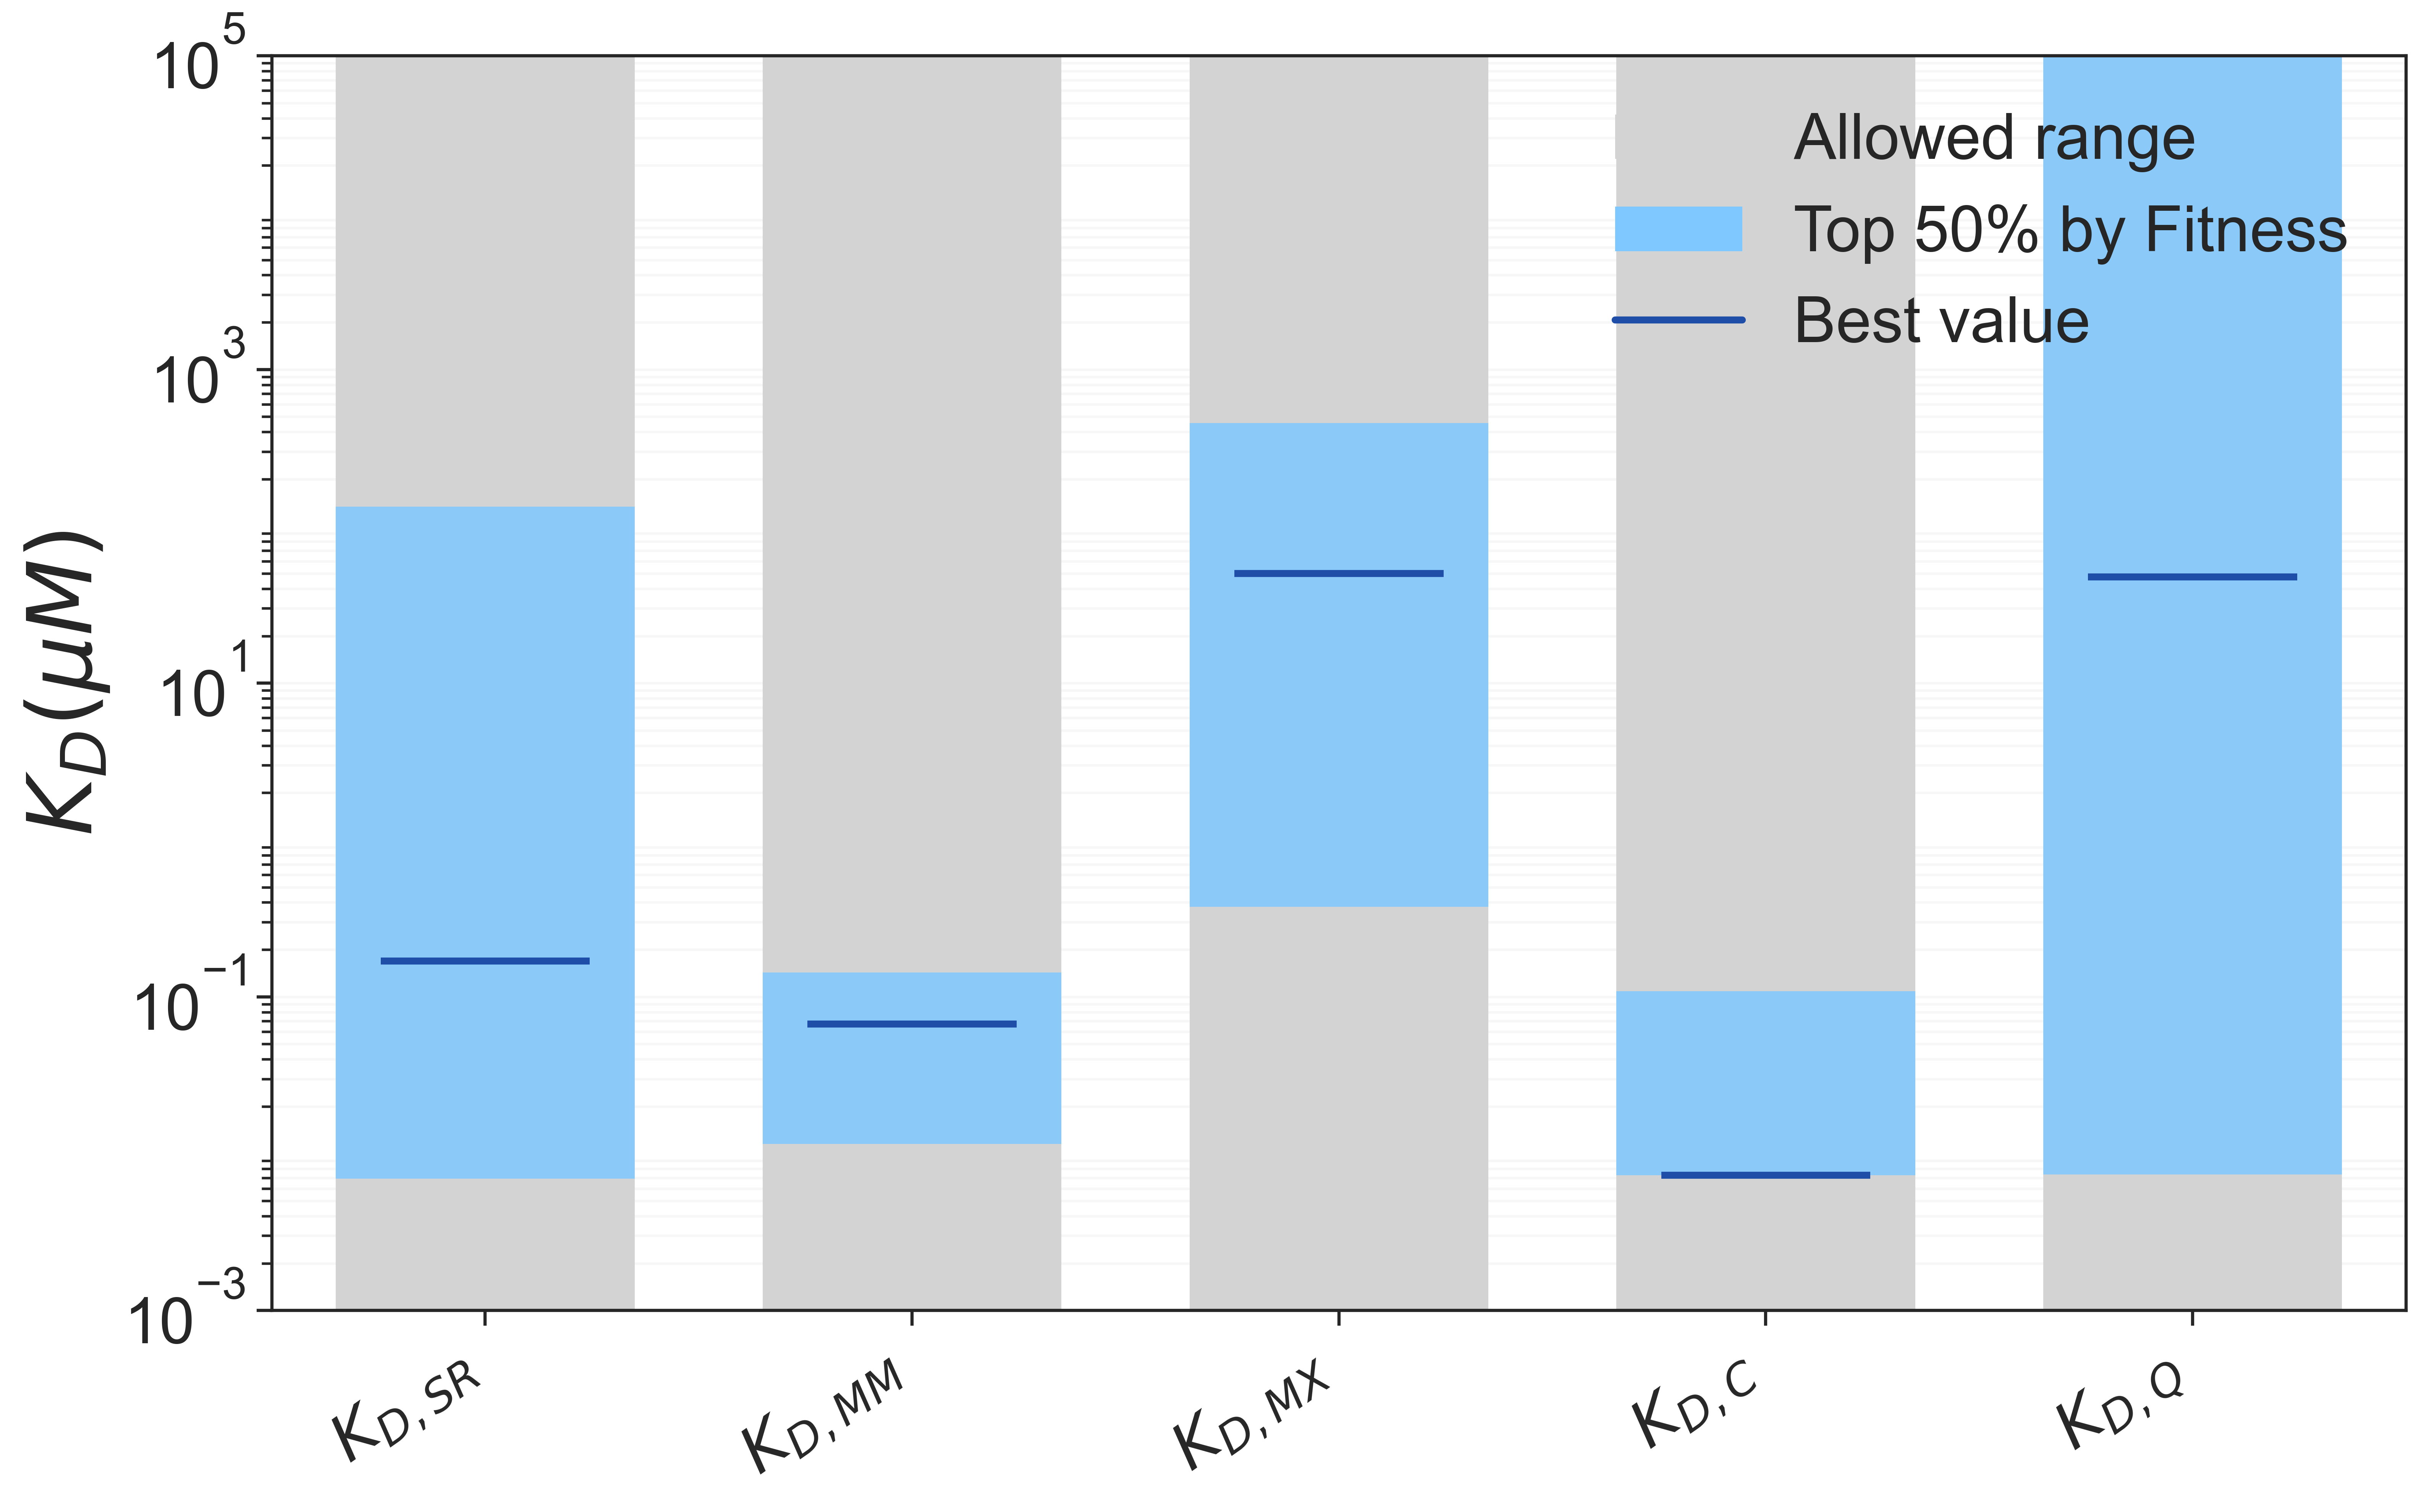

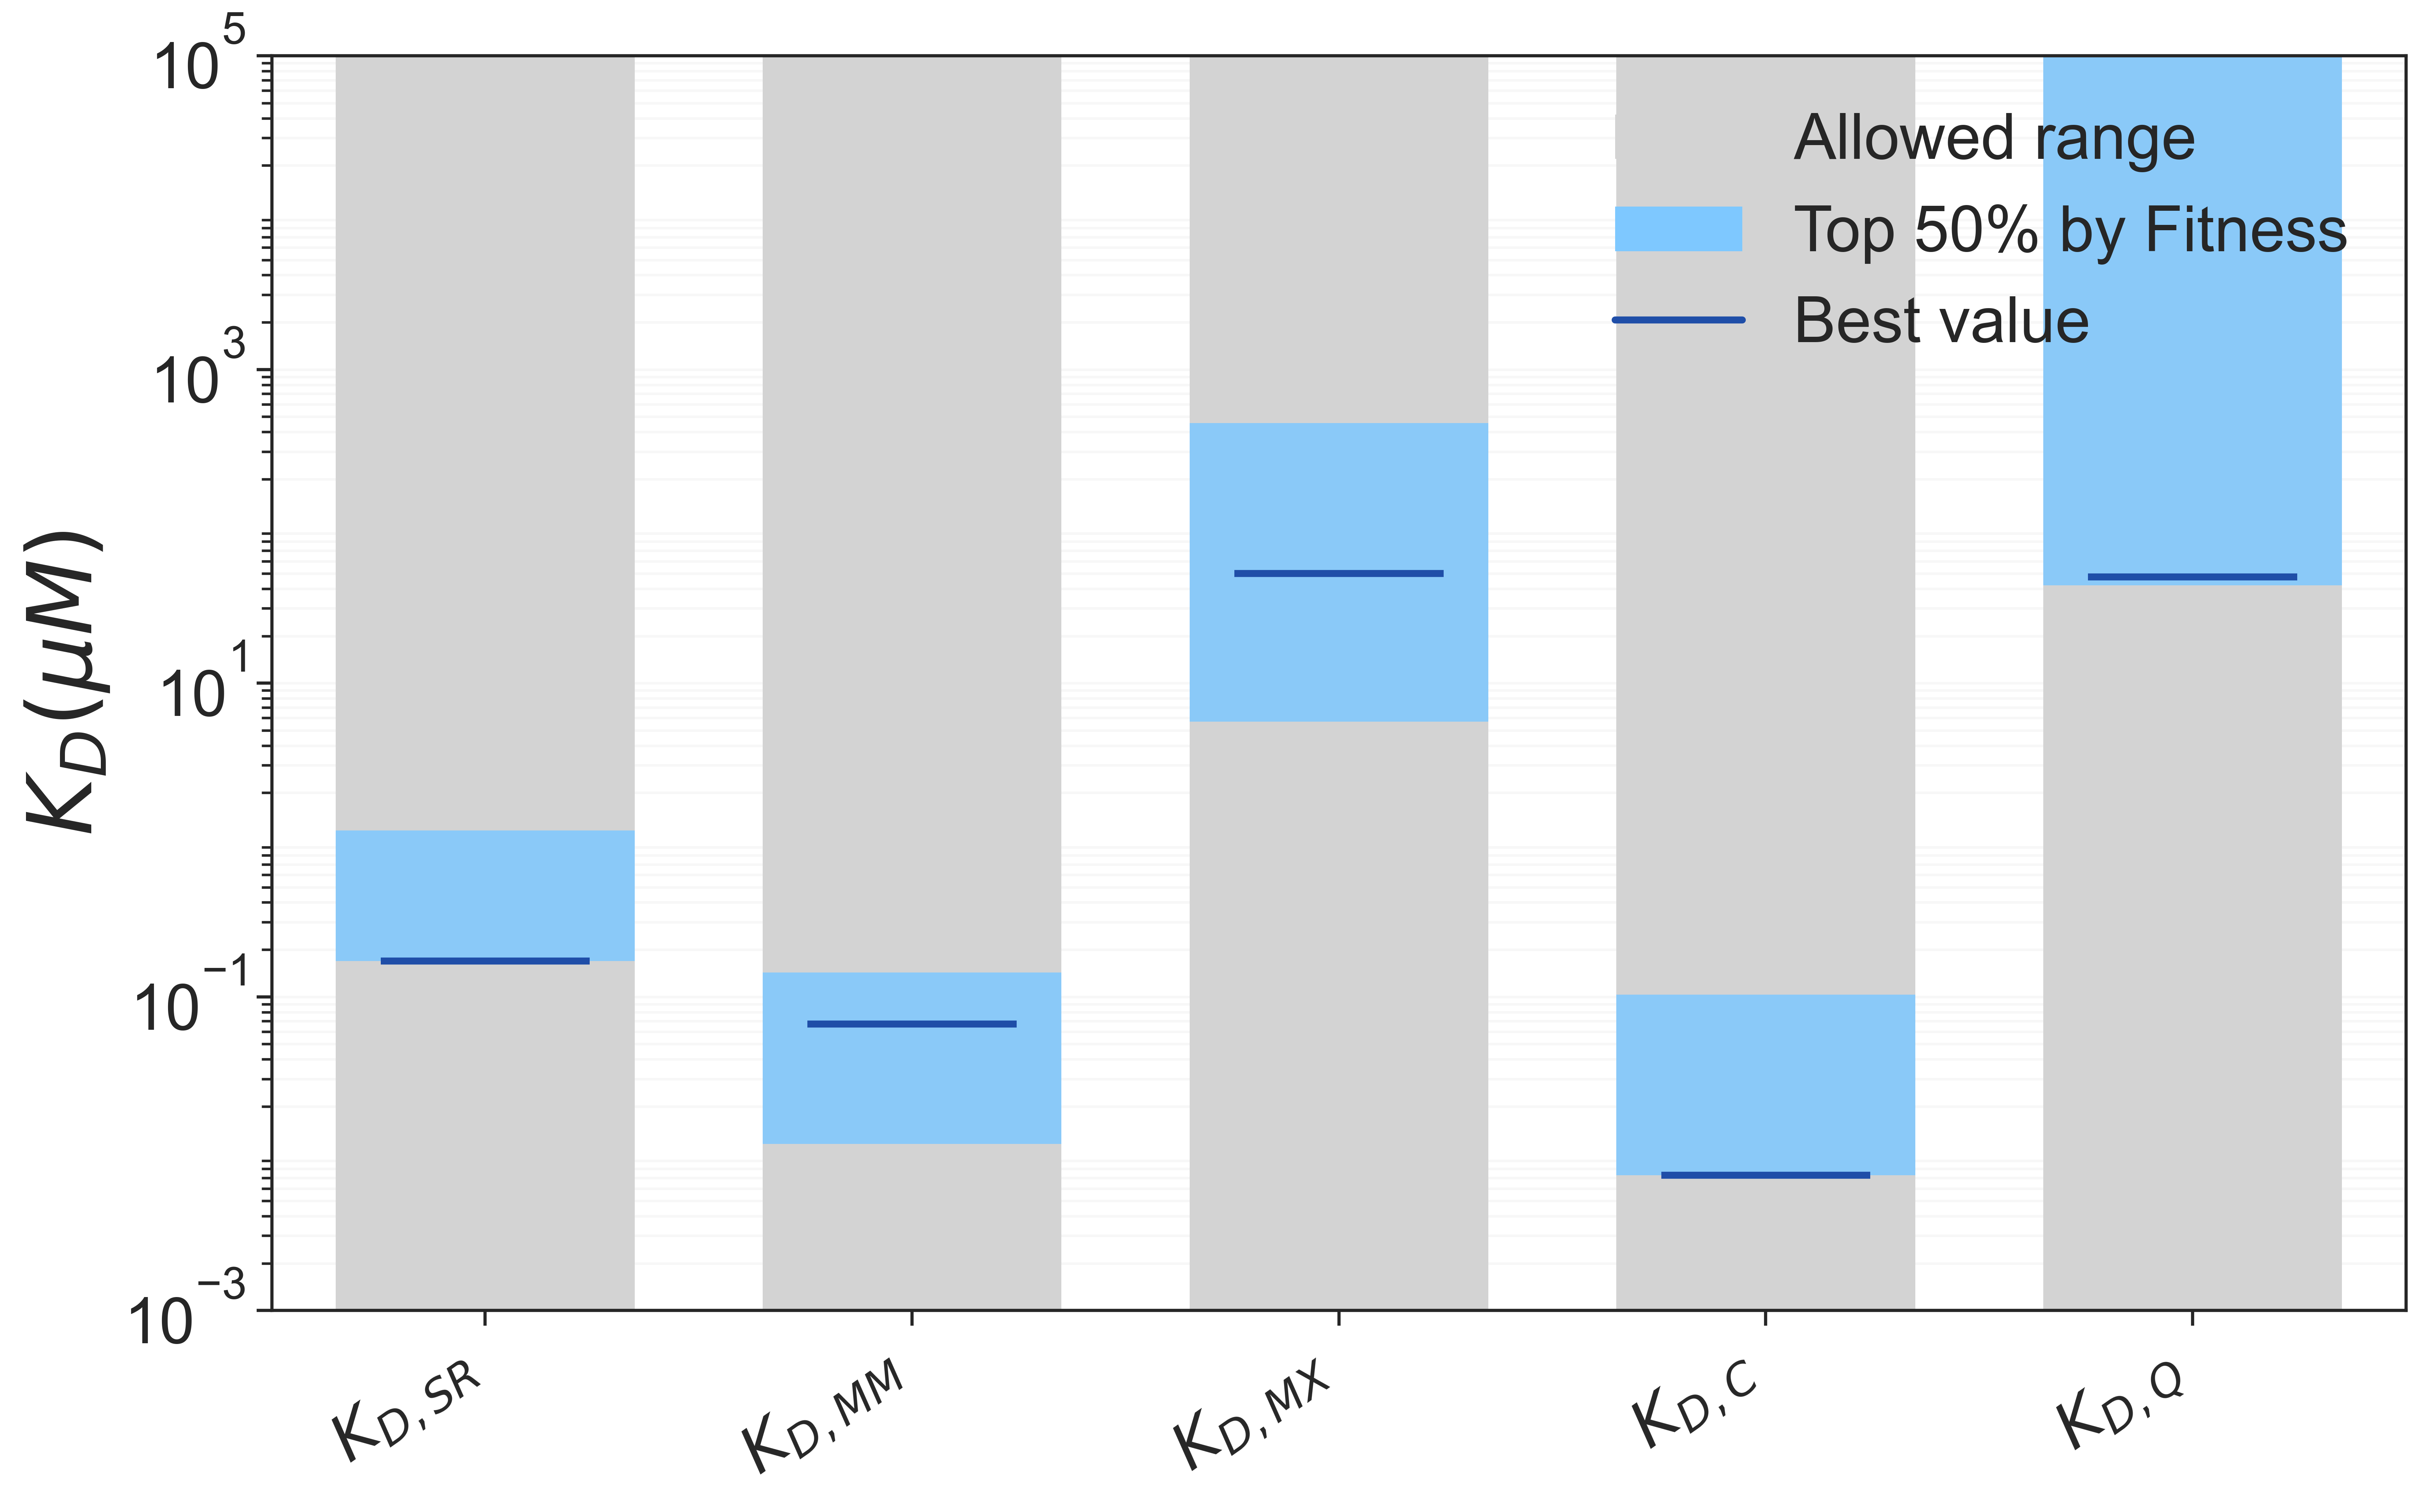

In [286]:
# show the distirbution of KD values.
# add an explicit penalty to diffusion, by 1.1 or 1.05 slower. 
#all top solutions
inputFile = f"{dir}/Top11_solutions_Dterm_parameters_{unique_id}.csv"
model.plot_parameter_KD_summary(percent=50, fontsize = 20, save_path=f"{imageDir}/sensitivity_KD_Top11_{unique_id}.png",inputFile=inputFile)
#solutions with correct diffusion behavior
inputFile=f"{dir}/parameter_solutions_Dslows_{unique_id}.csv"
model.plot_parameter_KD_summary(percent=50, fontsize = 20, save_path=f"{imageDir}/sensitivity_KD_Top11_Dslows_{unique_id}.png",inputFile=inputFile)


# distribution of sampled KD values from centroids

Total solutions loaded: 30
Using top 50% by Fitness -> 15 solutions.
p:  kDsr
best_row        kDsr     kDmm       kDmx       kDc        kDq
0  0.168677  0.07675  34.750285  0.007329  42.498453
p:  kDmm
best_row        kDsr     kDmm       kDmx       kDc        kDq
0  0.168677  0.07675  34.750285  0.007329  42.498453
p:  kDmx
best_row        kDsr     kDmm       kDmx       kDc        kDq
0  0.168677  0.07675  34.750285  0.007329  42.498453
p:  kDc
best_row        kDsr     kDmm       kDmx       kDc        kDq
0  0.168677  0.07675  34.750285  0.007329  42.498453
p:  kDq
best_row        kDsr     kDmm       kDmx       kDc        kDq
0  0.168677  0.07675  34.750285  0.007329  42.498453


/Users/margaret/github/munc13-cluster/ode/source/munc13.py:2587: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_val = max(float(best_row[p]), tiny)
/Users/margaret/github/munc13-cluster/ode/source/munc13.py:2587: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_val = max(float(best_row[p]), tiny)
/Users/margaret/github/munc13-cluster/ode/source/munc13.py:2587: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_val = max(float(best_row[p]), tiny)
/Users/margaret/github/munc13-cluster/ode/source/munc13.py:2587: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_val = max(float(best_row[p]), ti

Saved summary to: /Users/margaret/Dropbox/r2025/Munc13/IMAGES/Data_for_plots/sensitivity_KD_Centroid.png
Total solutions loaded: 15
Using top 50% by Fitness -> 7 solutions.
p:  kDsr
best_row        kDsr     kDmm       kDmx       kDc        kDq
0  0.168677  0.07675  34.750285  0.007329  42.498453
p:  kDmm
best_row        kDsr     kDmm       kDmx       kDc        kDq
0  0.168677  0.07675  34.750285  0.007329  42.498453
p:  kDmx
best_row        kDsr     kDmm       kDmx       kDc        kDq
0  0.168677  0.07675  34.750285  0.007329  42.498453
p:  kDc
best_row        kDsr     kDmm       kDmx       kDc        kDq
0  0.168677  0.07675  34.750285  0.007329  42.498453
p:  kDq
best_row        kDsr     kDmm       kDmx       kDc        kDq
0  0.168677  0.07675  34.750285  0.007329  42.498453


/Users/margaret/github/munc13-cluster/ode/source/munc13.py:2587: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_val = max(float(best_row[p]), tiny)
/Users/margaret/github/munc13-cluster/ode/source/munc13.py:2587: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_val = max(float(best_row[p]), tiny)
/Users/margaret/github/munc13-cluster/ode/source/munc13.py:2587: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_val = max(float(best_row[p]), tiny)
/Users/margaret/github/munc13-cluster/ode/source/munc13.py:2587: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  best_val = max(float(best_row[p]), ti

Saved summary to: /Users/margaret/Dropbox/r2025/Munc13/IMAGES/Data_for_plots/sensitivity_KD_Centroid_Dslows.png


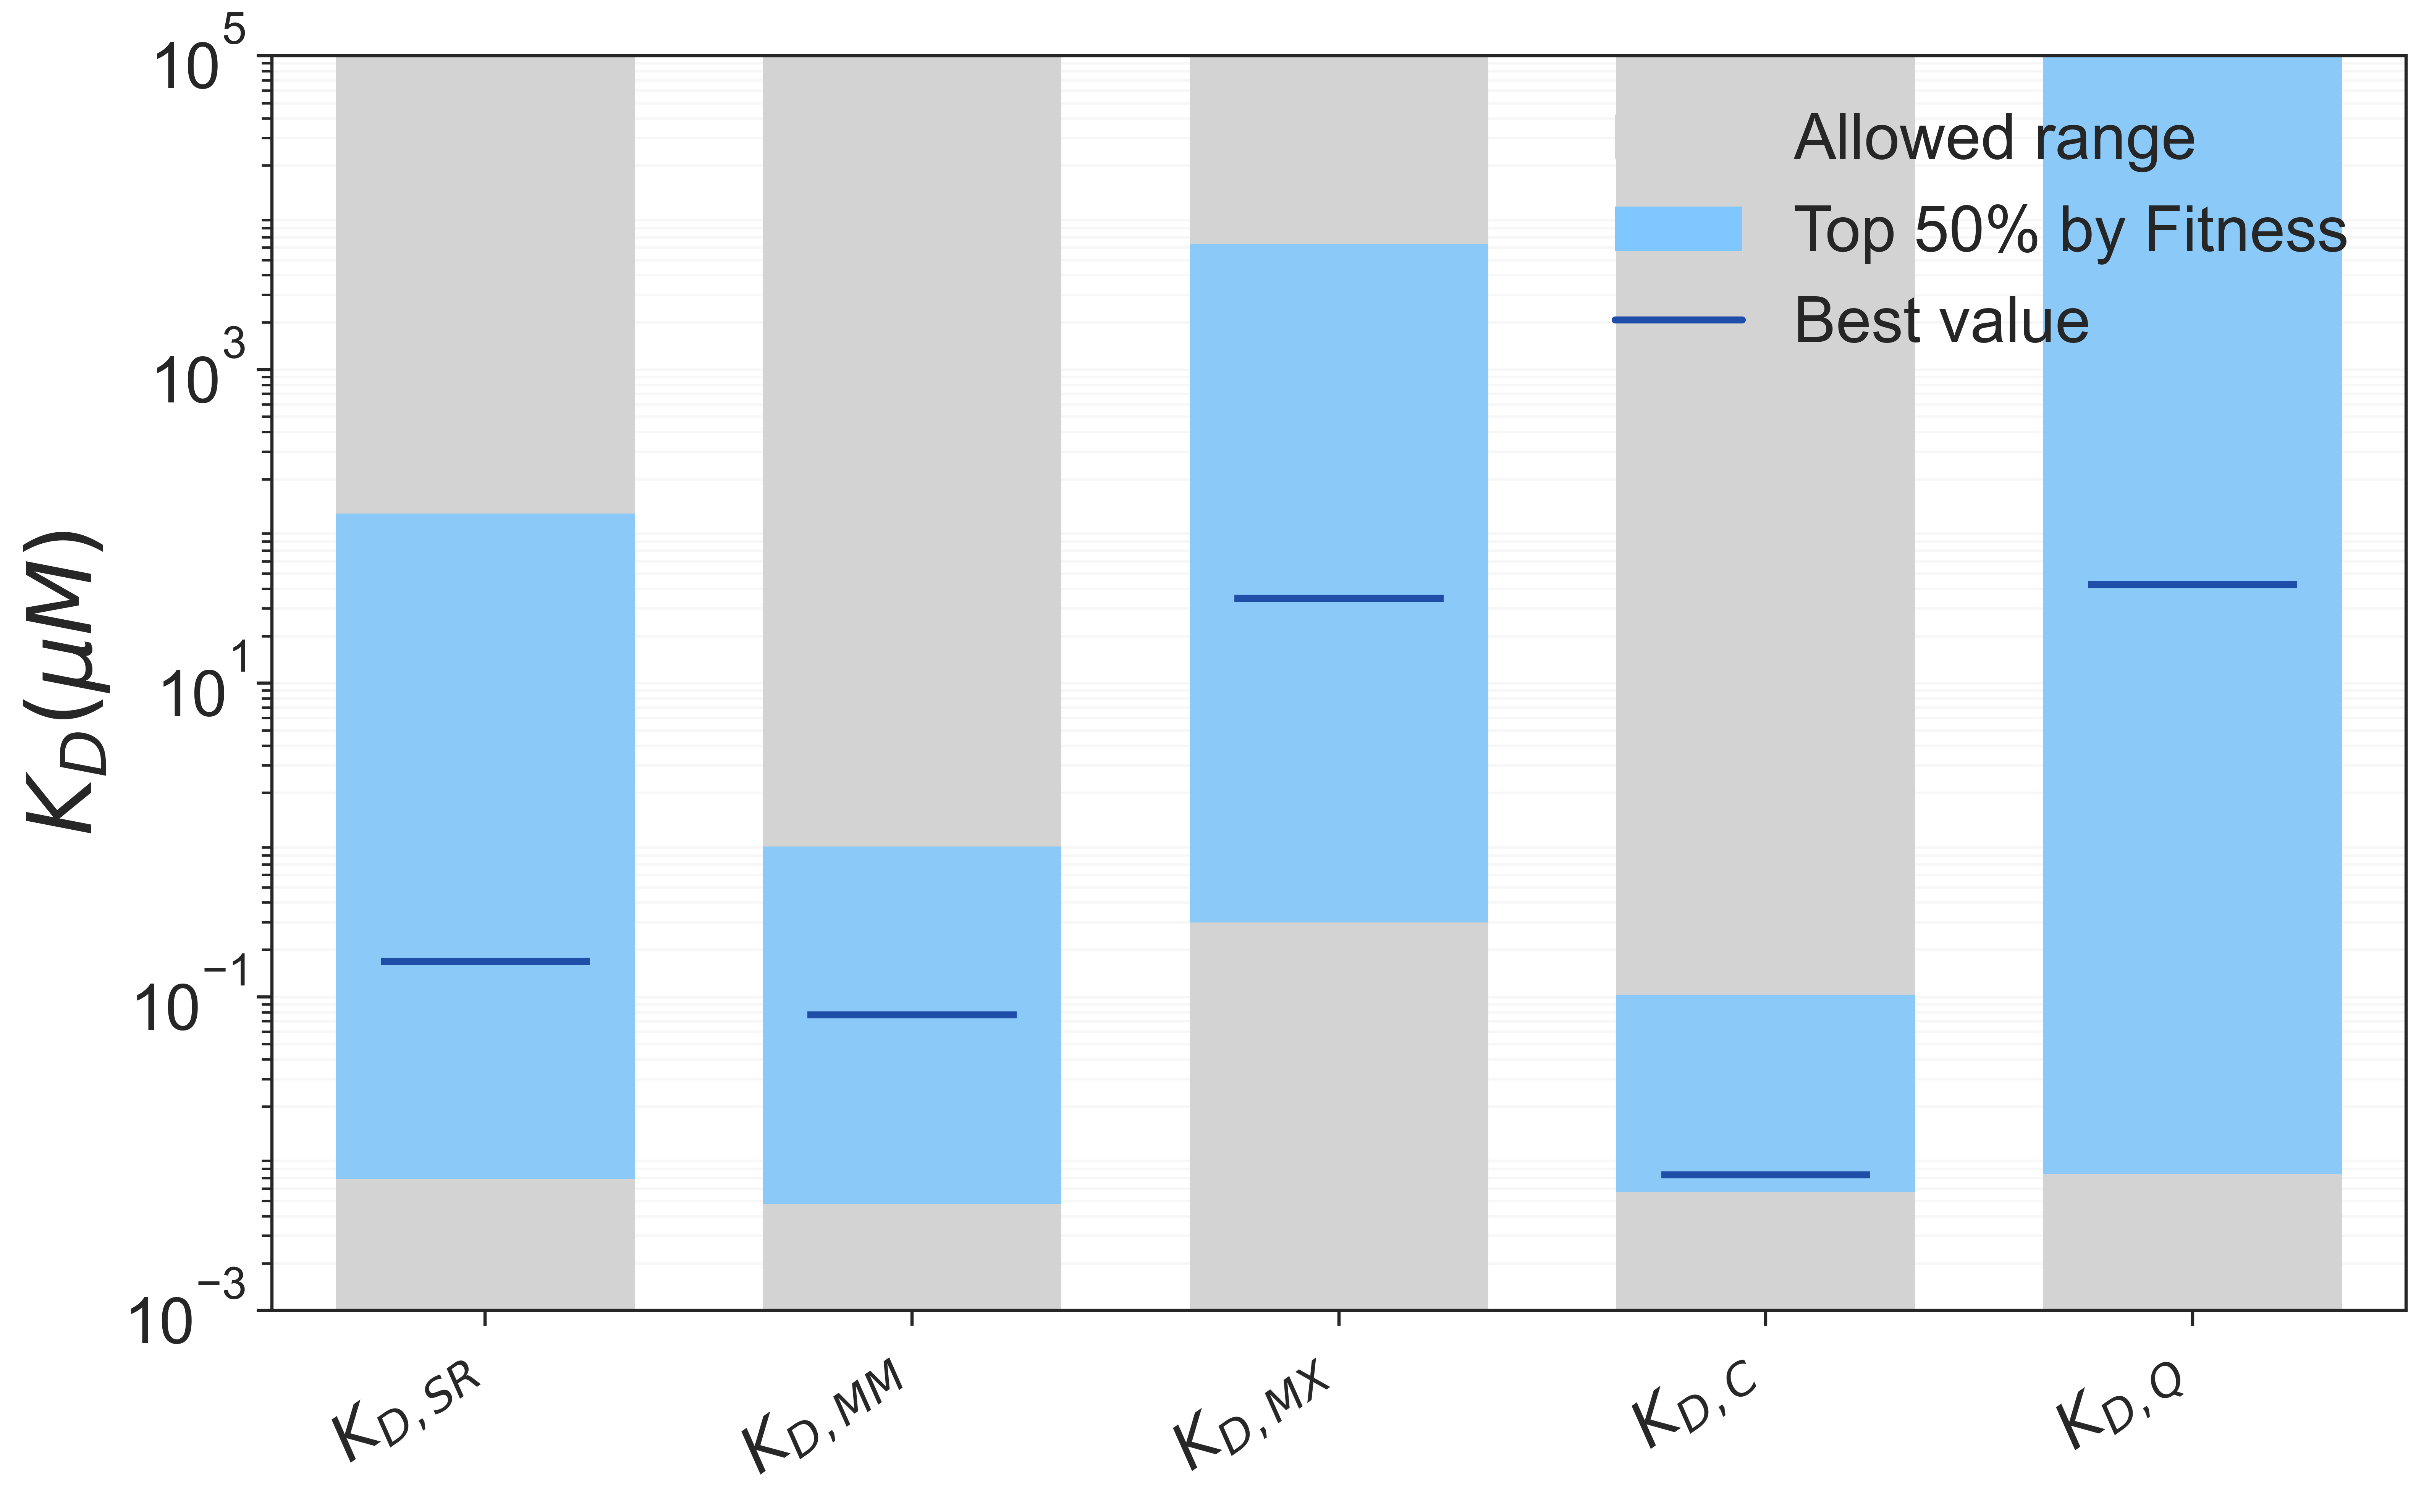

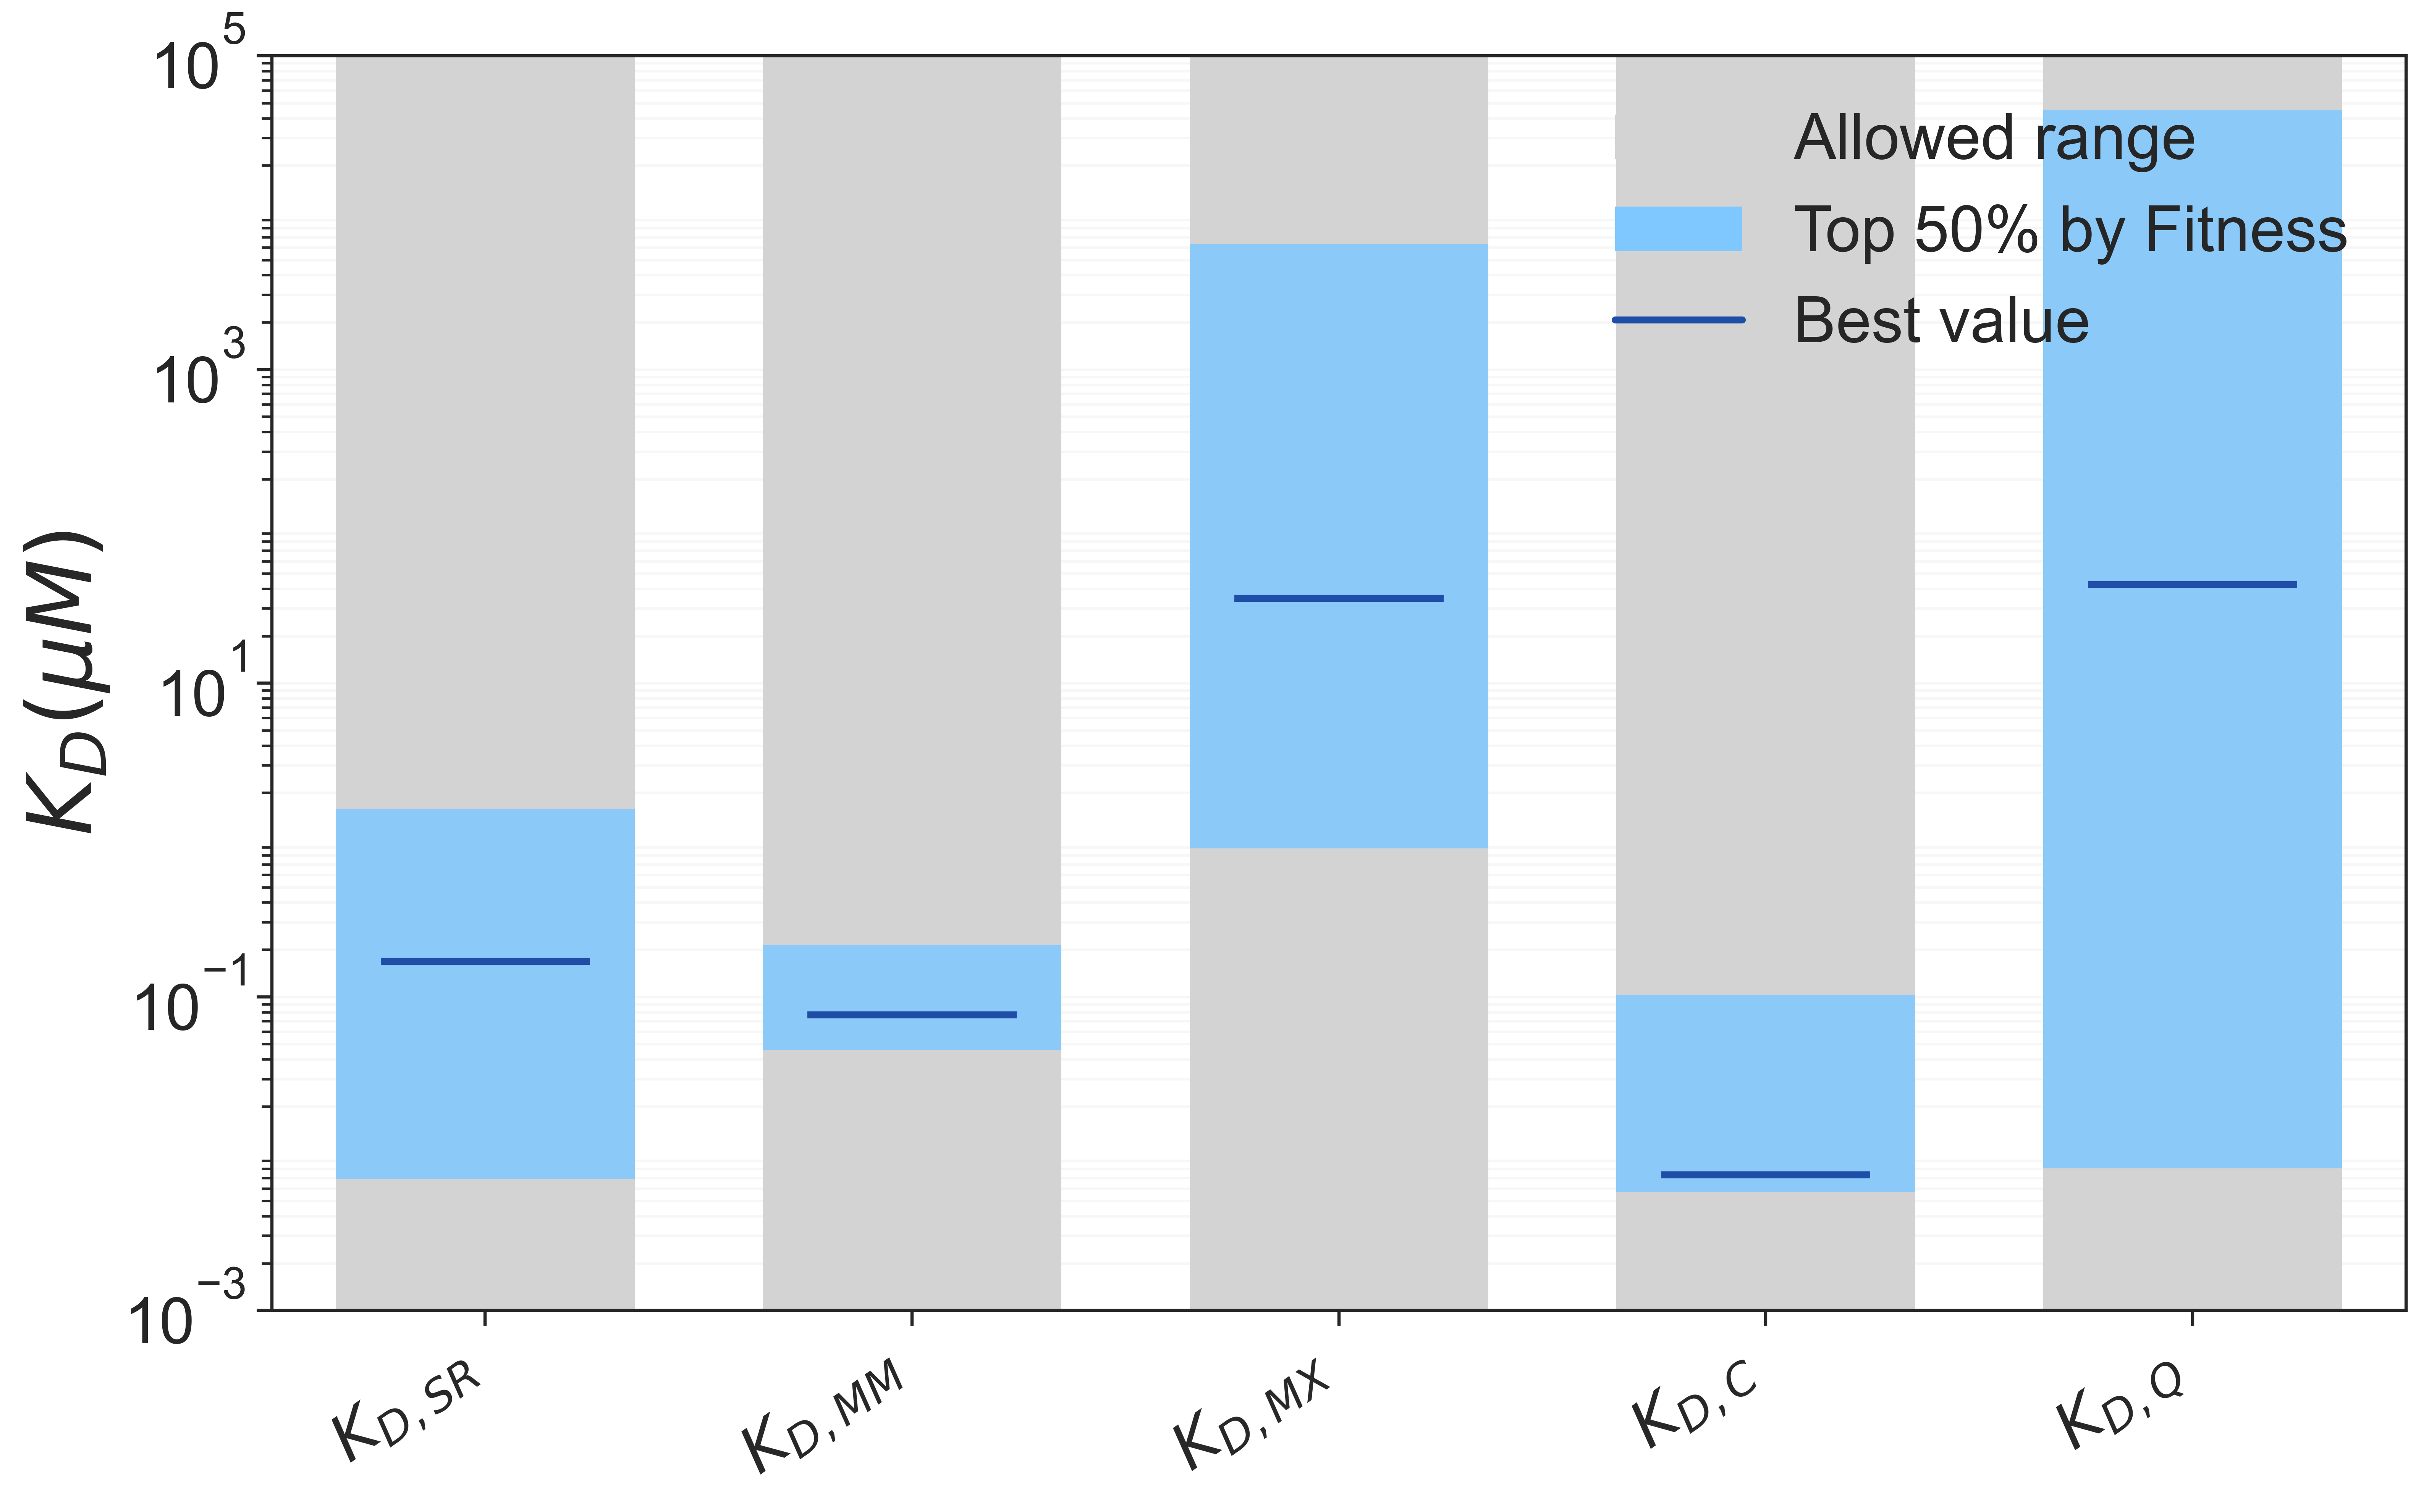

In [287]:
# show the distirbution of KD values.
# add an explicit penalty to diffusion, by 1.1 or 1.05 slower. 
#all top solutions

model.plot_parameter_KD_summary(percent=50, fontsize = 20, save_path=f"{dir}/sensitivity_KD_Centroid.png",inputFile=allCentroidParmFile)
#solutions with correct diffusion behavior
model.plot_parameter_KD_summary(percent=50, fontsize = 20, save_path=f"{dir}/sensitivity_KD_Centroid_Dslows.png",inputFile=parmFileSave)


# what happens if total munc13 is lowered to cluster density and diffusion

In [288]:
#first make sure you go back to the original candidate
candidate=selected_solutions[param_cols].iloc[whichRow].values

print(candidate)
print(selected_solutions.iloc[whichRow])
print('exp_metrics: ', exp_metrics.iloc[whichRow])
endo_candidate=list(candidate)
#change the munc13 concentration
endo_candidate[15]=endo_candidate[15]*0.3
#print(endo_candidate[15])
solOrig, solOrigPost=model.simulate(candidate)
sol, solPost=model.simulate(endo_candidate)

model.test_mass_conservation(sol)

[3.9494e-03 3.3091e-03 5.3559e+00 3.1180e+00 2.5850e-02 1.7039e+00
 4.2504e-02 2.6844e-01 7.6805e-02 4.3845e+01 3.3032e-01 4.2369e-04
 1.5279e-02 1.1874e+00 8.6274e+00 1.5477e-01 3.9865e+02 2.3632e-02
 1.0825e-50]
Rank        0.000000e+00
Fitness    -1.193540e+01
kfsr        3.949400e-03
krsr        3.309100e-03
kfmm        5.355900e+00
krmm        3.118000e+00
kfmx        2.585000e-02
krmx        1.703900e+00
kfc         4.250400e-02
krc         2.684400e-01
kfq         7.680500e-02
krq         4.384500e+01
eLoop       3.303200e-01
eDF         4.236900e-04
kfdd        1.527900e-02
Sd          1.187400e+00
stimUpSR    8.627400e+00
S0          1.547700e-01
R0          3.986500e+02
X0          2.363200e-02
Q0          1.082500e-50
Name: 0, dtype: float64
exp_metrics:  tau56        9.497432e+00
tau56Post    9.497440e+00
densPre      2.362813e-02
densPost     2.363042e-02
stimFact     2.707071e+00
percClust    1.433715e-03
percCPost    5.296697e-04
percDimer    8.740952e-01
percDPost    9.

In [289]:
specieNames=['S','R','M','D','X','S2','MX','SX','M2X','DX','Q','SQ','S2Q2','M3X','M4X','M5X','M6X','D2X','D3X','DMX','DM2X','D2MX','D2M2X']
len(specieNames)
endoDF=pd.DataFrame([sol[:,-1], solOrig[:,-1]],columns=specieNames)
print(endoDF['D'])

0    0.006511
1    0.021536
Name: D, dtype: float64


In [290]:
percClusterTotalEndo, percClustMemEndo, percMemEndo, pMonoEndo, pDimerEndo, pMXEndo, pDXEndo=model.calc_percentages_cluster(sol)
percClusterTotalOrig, percClustMemOrig, percMemOrig, pMonoOrig, pDimerOrig, pMXOrig, pDXOrig=model.calc_percentages_cluster(solOrig)
memCopyMuncEndo =   model.calculate_munc13_on_membrane(sol[:,-1]*model.cellVolume*602)      
memCopyMuncOrig =   model.calculate_munc13_on_membrane(solOrig[:,-1]*model.cellVolume*602)
print('memcopies, endo, orig', memCopyMuncEndo, memCopyMuncOrig)
print('pmono', pMonoEndo, pMonoOrig)
print('pdimer, ', pDimerEndo, pDimerOrig)

memcopies, endo, orig 41500.851725351604 124196.00595180974
pmono 0.20481890860424687 0.124470960953822
pdimer,  0.7908905521573215 0.8740951590875008


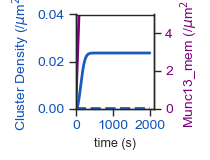

sizes pre stim, and sum:  [np.float64(0.20481890860424687), np.float64(0.7908905521573215), np.float64(0.004289114131020861)]
sizes POST stim, and sum:  [np.float64(0.13296187634755913), np.float64(0.8653851713448563), np.float64(0.0016527350762598396)]


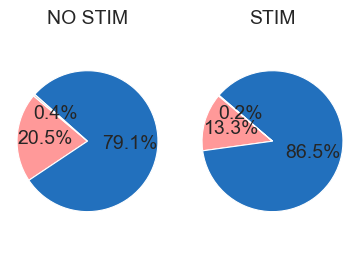

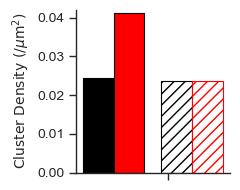

In [291]:
model.plot_time_resolved_density(sol, solPost,f"ENDO_{unique_id}_{whichRow}")
#create pie charts.
model.pie_charts(sol, solPost, [4,3], f"ENDO_{unique_id}_{whichRow}")
#plot cluster density as a bar plot
model.plot_density_vs_exp(sol, solPost, f"ENDO_{unique_id}_{whichRow}", whichExp='WT')

In [292]:
#plot diffusion, compare with WT overexpressed
[metricsWTOrig,metricsC2AOrig, metricsDOrig]=model.compute_all_metrics(candidate)
[metricsWTEndo,metricsC2AEndo, metricsDEndo]=model.compute_all_metrics(endo_candidate)

exp_endo_metrics = pd.DataFrame([metricsWT], columns=colWT)
C2A_endo_metrics = pd.DataFrame([metricsC2A], columns=colC2A)
D_endo_metrics = pd.DataFrame([metricsD], columns = colD)


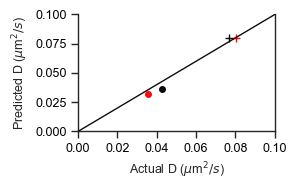

In [293]:
#plot diffusion, compare with WT overexpressed
[metricsWT,metricsC2A, metricsD]=model.compute_all_metrics(endo_candidate)
exp_endo_metrics = pd.DataFrame([metricsWT], columns=colWT)
C2A_endo_metrics = pd.DataFrame([metricsC2A], columns=colC2A)
D_endo_metrics = pd.DataFrame([metricsD], columns = colD)

fig, ax = plt.subplots(figsize=(3, 2))
D=D_endo_metrics['D'].iloc[0]
Dpost=D_endo_metrics['Dpost'].iloc[0]
DC2A=D_endo_metrics['C2AD'].iloc[0]
DC2Apost=D_endo_metrics['C2ADpost'].iloc[0]
ax.plot(model.D_exp_pre,D, markersize=4, marker='o', color='black', alpha=0.95, zorder=3)
ax.plot(model.D_exp_post,Dpost, markersize=4, marker='o', color='red', alpha=0.95, zorder=3)
ax.plot(model.D_exp_DC2A_pre,DC2A, markersize=6, marker='+', color='black', alpha=0.95, zorder=3)
ax.plot(model.D_exp_DC2A_post,DC2Apost, markersize=6, marker='+', color='red', alpha=0.95, zorder=3)
ax.plot(np.arange(0, 10)*0.1,np.arange(0, 10)*0.1, linewidth=1, ls='-', color='black', alpha=0.95, zorder=3)

ax.set_xlim(left=0, right=0.1)
ax.set_ylim(bottom=0, top=0.1)
ax.set_xlabel("Actual D ($\\mu$m$^2/s$)", fontsize=9)
ax.set_ylabel("Predicted D ($\\mu$m$^2/s$)", fontsize=9)
ax.tick_params(axis='both',labelcolor='black', labelsize=9)
#ax.set_xticks([0, 1000,2000])
# Get rid of bound box on the top.
ax.spines['top'].set_visible(False)
plt.tight_layout()
plt.savefig(f"/Users/margaret/Dropbox/r2025/Munc13/IMAGES/Diffusion_ENDO_{unique_id}_{whichRow}.png",dpi=300)
plt.show()

In [294]:
print(D_endo_metrics['D'].iloc[0])


0.036161607377341386


In [295]:
print(D_metrics['D'].iloc[whichRow])

0.03181133610910179


D, D endo 0.03181133610910179 0.036161607377341386


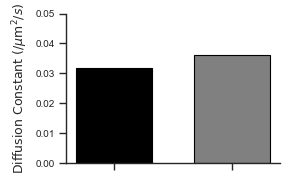

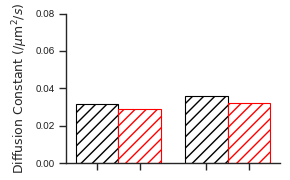

In [296]:
#make a bar plot of diffusion following lower
fig, ax = plt.subplots(figsize=(3,2))
print('D, D endo',D_metrics['D'].iloc[whichRow], D_endo_metrics['D'].iloc[0])
bar_width=0.18

fontsize=9
gap=0.1
centers=[0.9, 0.9+bar_width+gap]
ax.bar(0.9,  D_metrics['D'].iloc[whichRow],  width=bar_width,  capsize=4,
            color='black',   edgecolor='black', label='Exp (NO STIM)')
ax.bar(0.9+bar_width+gap, D_endo_metrics['D'].iloc[0], width=bar_width, capsize=4,
            color='gray', edgecolor='black', label='Exp (STIM)')
# Axes/labels
ax.set_ylabel(r"$\mathrm{Diffusion\ Constant}\ (/\mu\mathrm{m}^2/s)$", fontsize=fontsize)
ax.set_xticks(centers)
ax.set_xticklabels([], fontsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize * 0.8)
ax.set_ylim(bottom=0, top=0.05)

# Adjust layout to fit
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Cleanup
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
dpi=300
fig.savefig(f"{dir}/diffusion_WT_vs_endogenousGray_{unique_id}_{whichRow}.png", dpi=dpi) 

model.plot_diffusion_as_barplot(D_metrics['D'].iloc[whichRow], D_metrics['Dpost'].iloc[whichRow],D_endo_metrics['D'].iloc[0], D_endo_metrics['Dpost'].iloc[0], fileStr=f"_{unique_id}_{whichRow}_ENDO_both")

In [297]:
print(exp_endo_metrics)
print(exp_metrics)

      tau56  tau56Post  densPre  densPost  stimFact  percClust  percCPost  \
0  9.497414   9.499034  0.02362  0.023628  2.595971   0.004289   0.001653   

   percDimer  percDPost     SSval     SSvalPost  
0   0.790891   0.865385  0.000002  2.936665e-08  
        tau56  tau56Post   densPre  densPost  stimFact  percClust  percCPost  \
0    9.499448   9.554127  0.010666  0.030212  2.141027   0.055718   0.073714   
1    8.921983   8.921987  0.022384  0.022384  3.020534   0.009538   0.003158   
2    9.407589   9.445104  0.013745  0.015596  3.120100   0.076438   0.027799   
3    9.448388   9.498524  0.021029  0.030149  2.769656   0.123572   0.063965   
4    9.497432   9.497440  0.023628  0.023630  2.707071   0.001434   0.000530   
5   10.485592  10.586704  0.019643  0.026400  2.956587   0.129886   0.059041   
6    7.160280   7.161373  0.026592  0.026961  3.082150   0.150738   0.049585   
7    8.098222   8.123176  0.019777  0.024181  2.898184   0.133254   0.056215   
8    5.195175   5.195225 

# make plots for lipid impairment

In [298]:
#now lower the kfsr, and also set the stimUp to 1. 
pip_candidate=list(candidate)
pip_candidate[0]=pip_candidate[0]*0.5 #kfsr
pip_candidate[14]=1.0 #stimUpSR
#R0 is [16]
#pip_candidate[16]=pip_candidate[16]*0.2

sol, solPost=model.simulate(pip_candidate)

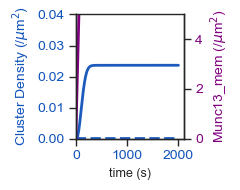

sizes pre stim, and sum:  [np.float64(0.1640183623005052), np.float64(0.8333703878577351), np.float64(0.0026107202224742022)]
sizes POST stim, and sum:  [np.float64(0.13690031898625746), np.float64(0.8613392646200778), np.float64(0.0017601710207545557)]


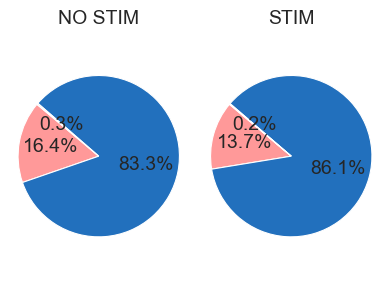

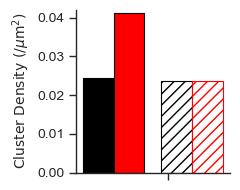

In [299]:
model.plot_time_resolved_density(sol, solPost,f"dPIP_{unique_id}_{whichRow}")
#create pie charts.
model.pie_charts(sol, solPost, [4,3], f"dPIP_{unique_id}_{whichRow}")
#plot cluster density as a bar plot
model.plot_density_vs_exp(sol, solPost, f"dPIP_{unique_id}_{whichRow}", whichExp='WT')

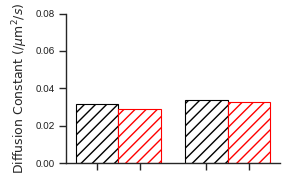

In [300]:
#plot diffusion, compare with WT overexpressed
[metricsWT,metricsC2A, metricsD]=model.compute_all_metrics(pip_candidate)
exp_pip_metrics = pd.DataFrame([metricsWT], columns=colWT)
C2A_pip_metrics = pd.DataFrame([metricsC2A], columns=colC2A)
D_pip_metrics = pd.DataFrame([metricsD], columns = colD)

model.plot_diffusion_as_barplot(D_metrics['D'].iloc[whichRow], D_metrics['Dpost'].iloc[whichRow],D_pip_metrics['D'].iloc[0], D_pip_metrics['Dpost'].iloc[0], fileStr=f"_{unique_id}_{whichRow}_dPIP")